# BootCamp Portfolio


### This portfolio project was chosen to 
1. bring together the skills I acquired on the level 4 Data Analyst Bootcamp
2. develop those skills further
3. expand my understanding 
4. complete an end to end data analytic project
    - from data gathering
    - to data visualisation 


## Dataset - Time use  

One way comedies appeal to wide audiences is by simply recognising the ridiculousness of the mundane norms of everyday life.   As was achieved in Bridget Christie’s ‘The Change’ (first aired June 2023, Channel 4).  Christie portrays a fifty-year-old-mum of two, Linda, who meticulously recorded all her hours of unpaid work in the family home.  She cashes in her unpaid hours and goes off for a break to claim back her identity.


Whilst we might not be as meticulous as Linda, a lot can be learnt from studying how we spend our time.  The OECD (Organisation for Economic Co-operation and Development) Time Use Database consolidates datasets of large-scale time-use surveys conducted by national statistical agencies. Surveys classify day-to-day activities across the duration of 24 hours (1,440 minutes).  The dataset provides the average time use for OECD countries plus China, India, and South Africa.


Exploring time use gender differences across the world provides an important insight to understanding peoples’ living conditions and as in Linda's case her sense of identity and wellbeing.

There are also considerable financial implications to how much time we spend in paid employment. Whilst working on this portfolio project it was reported in the news that:

> Women would need to work for an extra 19 years to retire with the same pension savings as men, according to data from the Pensions Policy Institute.
The research found women retiring at 67 – the new UK state pension age from 2026 – will have saved an average of £69,000, compared with £205,000 for men. <br/>
                - *source  The Guardian 7th Feb 2024*



In [1]:
import pandas as pd # import pandas to view and manipilate dataframe
import numpy as np #  for numeric calculations
import matplotlib.pyplot as plt #  for visualisations
import seaborn as sns #  for visualisations

In [2]:
#load dataset into DataFrame 

df = pd.read_csv('data/time_use.csv')



## Initial EDA (exploratory data analysis)

explore:
 
1. size of dataframe
2. content
3. what it looks like
4. format

In [3]:
# return number of rows and columns

df.shape

(494, 13)

In [4]:
# display first 5 entries

df.head()

,LOCATION,Country,DESC,Description,SEX,Sex,AGE,Age,T,Time,Value,Flag Codes,Flags
0,AUS,Australia,UPW,Unpaid work,TOTAL,Total,15_64,15-64,LY,Latest year,243.16887,D,Difference in methodology
1,AUS,Australia,UPW,Unpaid work,WOMEN,Women,15_64,15-64,LY,Latest year,311.00000,D,Difference in methodology
2,AUS,Australia,UPW,Unpaid work,MEN,Men,15_64,15-64,LY,Latest year,171.59583,D,Difference in methodology
3,AUT,Austria,UPW,Unpaid work,TOTAL,Total,15_64,15-64,LY,Latest year,202.00000,NaN,NaN
4,AUT,Austria,UPW,Unpaid work,WOMEN,Women,15_64,15-64,LY,Latest year,269.17200,NaN,NaN


In [5]:
# explore dataFrame data types and null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     494 non-null    object 
 1   Country      494 non-null    object 
 2   DESC         494 non-null    object 
 3   Description  494 non-null    object 
 4   SEX          494 non-null    object 
 5   Sex          494 non-null    object 
 6   AGE          494 non-null    object 
 7   Age          494 non-null    object 
 8   T            494 non-null    object 
 9   Time         494 non-null    object 
 10  Value        494 non-null    float64
 11  Flag Codes   60 non-null     object 
 12  Flags        60 non-null     object 
dtypes: float64(1), object(12)
memory usage: 50.3+ KB


In [6]:
# view statistical info for numerical data
# values represent minutes in a day
# so should be in the range of 0 - 1440

df.describe()

,Value
count,494.000000
mean,288.087435
std,215.987783
min,3.260380
25%,148.711420
50%,261.166335
75%,341.246030
max,760.888060


In [7]:
# identify the categories and measures in Dataframe

print(df['Country'].nunique())
print(df['Description'].unique())
print(df['Sex'].unique())
print(df['Age'].unique())
print(df['Time'].unique())
print(df['Flags'].unique())
print(df['Country'].unique().tolist())

33
['Unpaid work' 'Personal care' 'Leisure' 'Other' 'Paid work or study']
['Total' 'Women' 'Men']
['15-64']
['Latest year']
['Difference in methodology' nan]
['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Türkiye', 'United Kingdom', 'United States', "China (People's Republic of)", 'Estonia', 'India', 'Latvia', 'Slovenia', 'South Africa', 'Luxembourg', 'Lithuania']


## Date Preparation

clean and tidy data

1. remove duplicate data
2. indentfy missing data
3. drop irrelevant columns and rows 

In [8]:
# Are SEX and Sex giving the same information?

print(df['SEX'].value_counts())                   

SEX
TOTAL    165
MEN      165
WOMEN    164
Name: count, dtype: int64


In [9]:
print(df['Sex'].value_counts())

Sex
Total    165
Men      165
Women    164
Name: count, dtype: int64


### Note

1. some countries are flagged as using different methodology in acquiring their data
2. women have 1 less row entry than men
3. there are duplicated columns


In [10]:
# return list of countries flagged as using different methodology

d_countries = list(set(df[df['Flag Codes'] == 'D']['Country'].tolist()))
d_countries

["China (People's Republic of)", 'Lithuania', 'Mexico', 'Australia']

### Note 
 
1. this list will be referred back when analysing any anomalies

In [11]:
# check for duplicated rows

df.loc[df.duplicated()]

# no row duplications found

,LOCATION,Country,DESC,Description,SEX,Sex,AGE,Age,T,Time,Value,Flag Codes,Flags


In [12]:
# remove duplicated columns

df = df.drop(['SEX', 'AGE', 'T'],axis=1).copy()
df.head()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
0,AUS,Australia,UPW,Unpaid work,Total,15-64,Latest year,243.16887,D,Difference in methodology
1,AUS,Australia,UPW,Unpaid work,Women,15-64,Latest year,311.00000,D,Difference in methodology
2,AUS,Australia,UPW,Unpaid work,Men,15-64,Latest year,171.59583,D,Difference in methodology
3,AUT,Austria,UPW,Unpaid work,Total,15-64,Latest year,202.00000,NaN,NaN
4,AUT,Austria,UPW,Unpaid work,Women,15-64,Latest year,269.17200,NaN,NaN


### Note

Analysis will look at country and gender differences so it will be helpful to separate by:

1. country totals
2. gender values

into separate dataframes

In [13]:
# Create a mask to filter dataframe 
# for total entries (male and female combined) for each country
# from copy of time_gdp_df, so it remains unchanged

totalmask = df['Sex'] == 'Total'
totals_df = df.copy()
totals_df = df[totalmask]
totals_df.head()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
0,AUS,Australia,UPW,Unpaid work,Total,15-64,Latest year,243.16887,D,Difference in methodology
3,AUT,Austria,UPW,Unpaid work,Total,15-64,Latest year,202.00000,NaN,NaN
6,BEL,Belgium,UPW,Unpaid work,Total,15-64,Latest year,191.82016,NaN,NaN
9,CAN,Canada,UPW,Unpaid work,Total,15-64,Latest year,186.00000,NaN,NaN
12,DNK,Denmark,UPW,Unpaid work,Total,15-64,Latest year,216.62733,NaN,NaN


In [14]:
# Group dataframe by country for total of activies recorded
# Values should total 1440 minutes per day, 
# allowing for some slight rounding differences 
# create column giving differences between total minutes and 1440

gb_totals_df = totals_df.groupby(['Country'])['Value'].agg(['sum'])
gb_totals_df['Difference'] = gb_totals_df['sum'] - 1440
gb_totals_df.head()


,sum,Difference
Country,,
Australia,1439.999979,-0.000021
Austria,1440.046669,0.046669
Belgium,1440.191550,0.191550
Canada,1440.066030,0.066030
China (People's Republic of),1439.999961,-0.000039


In [15]:
# filter for countries where totals values are not 1440 minutes per day, 
# allowing for rounding differences 

gb_totals_df[(gb_totals_df['sum'] < 1439) | (gb_totals_df['sum'] > 1441)]

,sum,Difference
Country,,
United States,1469.02058,29.02058


### Note

1. United States Total values are 29.02 mins more than the expected 1440 mins
2. look for anomalies when examining gender data

In [16]:
# mask used to filter only male and female data
# from copy of time_gdp_df, so it remains unchanged

mfmask = df['Sex'] != 'Total'
gender_df = df.copy()
gender_df = gender_df[mfmask]
gender_df.head()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
1,AUS,Australia,UPW,Unpaid work,Women,15-64,Latest year,311.00000,D,Difference in methodology
2,AUS,Australia,UPW,Unpaid work,Men,15-64,Latest year,171.59583,D,Difference in methodology
4,AUT,Austria,UPW,Unpaid work,Women,15-64,Latest year,269.17200,NaN,NaN
5,AUT,Austria,UPW,Unpaid work,Men,15-64,Latest year,135.28297,NaN,NaN
7,BEL,Belgium,UPW,Unpaid work,Women,15-64,Latest year,237.32297,NaN,NaN


In [17]:
# Group dataframe by country and sex for total of activies recorded
# Values should total 1440 minutes per day, 
# allowing for some slight rounding differences 
# create column giving differences between total minutes and 1440

gb_gender_df = gender_df.groupby(['Country', 'Sex'])['Value'].agg(['sum'])
gb_gender_df['Difference'] = gb_gender_df['sum'] - 1440
gb_gender_df




sum  Difference
Country        Sex                           
Australia      Men    1440.000007    0.000007
               Women  1440.000000    0.000000
Austria        Men    1439.781422   -0.218578
               Women  1440.214748    0.214748
Belgium        Men    1440.000011    0.000011
...                           ...         ...
Türkiye        Women  1440.048114    0.048114
United Kingdom Men    1439.999994   -0.000006
               Women  1439.999958   -0.000042
United States  Men    1458.491595   18.491595
               Women  1479.291418   39.291418

[66 rows x 2 columns]

In [18]:
# filter for countries where totals values are not 1440 minutes per day, 
# allowing for differences for rounding 

gb_gender_df[(gb_gender_df['sum'] < 1439) | (gb_gender_df['sum'] > 1441)]

sum  Difference
Country       Sex                           
Mexico        Women  1391.707730  -48.292270
South Africa  Women  1158.150131 -281.849869
United States Men    1458.491595   18.491595
              Women  1479.291418   39.291418

### Note

1. in the gender_df 4 sum entries do not total 1440 minutes
2. explore those entries for anomalies 


In [19]:
# to explore anomalies
# define function to select and return entries by 'Country' and 'Sex'

def select(x,y):
    return df.loc[(df['Country'] == x) & (df['Sex'] == y)]

In [20]:
# return entries for Mexico, Women using select function
# as total value is 48.29 mins under expected

select('Mexico', 'Women')

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
43,MEX,Mexico,UPW,Unpaid work,Women,15-64,Latest year,331.29083,D,Difference in methodology
136,MEX,Mexico,PCA,Personal care,Women,15-64,Latest year,641.76294,D,Difference in methodology
229,MEX,Mexico,LEI,Leisure,Women,15-64,Latest year,159.11086,D,Difference in methodology
321,MEX,Mexico,OTH,Other,Women,15-64,Latest year,23.21456,D,Difference in methodology
414,MEX,Mexico,PAW,Paid work or study,Women,15-64,Latest year,236.32854,D,Difference in methodology


### Note
Review of entries for - Mexico, Women -  shows
1. no omission
2. is a country flagged as has used 'Difference in methodology'
3. further examine Mexico's data - does Women's data fit with Total data, after accounting for Men's data?

In [21]:
# define function to select a Country's data and create a pivot table 


def select_c(x):
    
    country = df.loc[(df['Country'] == x)]
    pivot = country.pivot(index='Description', columns='Sex', values='Value')
    pivot.reset_index(inplace=True)
    pivot.rename_axis(None, axis=1, inplace=True)
    return pivot

In [22]:
# apply select_c function to
# return entries for Mexico

mexico = select_c('Mexico')
mexico

,Description,Men,Total,Women
0,Leisure,186.60216,171.927430,159.11086
1,Other,19.42664,21.448614,23.21456
2,Paid work or study,478.33298,349.152160,236.32854
3,Personal care,624.21899,633.583860,641.76294
4,Unpaid work,131.41922,263.887880,331.29083


In [23]:
# define function to return revised time for each activity 
# from Total data for given sex

def revise(df, sex):
    if sex == 'Women':
        df['Women revised'] = round((df['Total'] * 2) - df['Men'], 5)
        df['diff'] = df['Women'] - df['Women revised']
    
    elif sex == 'Men':
        df['Men revised'] = round((df['Total'] * 2) - df['Women'], 5)
        df['diff'] = df['Men'] - df['Men revised']
    
    else: print('select Men or Women only')
        



In [24]:
# apply revise function to return revised values for Mexico women

revise(mexico, 'Women')
mexico

,Description,Men,Total,Women,Women revised,diff
0,Leisure,186.60216,171.927430,159.11086,157.25270,1.85816
1,Other,19.42664,21.448614,23.21456,23.47059,-0.25603
2,Paid work or study,478.33298,349.152160,236.32854,219.97134,16.35720
3,Personal care,624.21899,633.583860,641.76294,642.94873,-1.18579
4,Unpaid work,131.41922,263.887880,331.29083,396.35654,-65.06571


### Note
Review of entries for - Mexico, Women -  shows
 
1. there is disparity between the 'Total' values for Paid Work and Unpaid Work and the mean of Men and Women values. 
1. determine value for women from Mexico total score by reverse calculation of mean score and deduct values for Mexico men
1. increasing unpaid to 396.35654 mins (65.07 increase) and paid work to 219.97134 (16.36 decrease) will correct disparity with Total values and take total values for women to 1440 

In [25]:
# update original df with revised values for Mexico/Women

df.loc[43, 'Value'] = 396.35654
df.loc[414, 'Value'] = 219.97134

In [26]:
# return entries for South Africa, Women using select function
# as total value is 281.85 mins under expected

select('South Africa', 'Women')

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
91,ZAF,South Africa,UPW,Unpaid work,Women,15-64,Latest year,249.588410,NaN,NaN
184,ZAF,South Africa,PCA,Personal care,Women,15-64,Latest year,694.829470,NaN,NaN
369,ZAF,South Africa,OTH,Other,Women,15-64,Latest year,18.698801,NaN,NaN
462,ZAF,South Africa,PAW,Paid work or study,Women,15-64,Latest year,195.033450,NaN,NaN


In [27]:
# apply select_c function to
# return entries for Mexico

safrica = select_c('South Africa')
safrica

,Description,Men,Total,Women
0,Leisure,334.19431,305.89819,NaN
1,Other,13.17740,16.16213,18.698801
2,Paid work or study,294.16318,240.57607,195.033450
3,Personal care,695.37225,695.07886,694.829470
4,Unpaid work,102.93914,182.28479,249.588410


In [28]:
# apply revise function to return revised values for South Africa women

revise(safrica, 'Women')
safrica

,Description,Men,Total,Women,Women revised,diff
0,Leisure,334.19431,305.89819,NaN,277.60207,NaN
1,Other,13.17740,16.16213,18.698801,19.14686,-0.448059
2,Paid work or study,294.16318,240.57607,195.033450,186.98896,8.044490
3,Personal care,695.37225,695.07886,694.829470,694.78547,0.044000
4,Unpaid work,102.93914,182.28479,249.588410,261.63044,-12.042030


### Note
Review of entries for - South Africa, Women -  shows
1. omission of 'Leisure' entry
2. the omision and revised values for 'Paid work or study' and 'Unpaid work' would account for the short fall of 281.85 minutes 
 

In [29]:
# update original df with revised values for South Africa, Women
# create 'Leisure' entry for South Africa, Women
# insert new row, use len to identify next index entry to place it

df.loc[462, 'Value'] = 186.98896
df.loc[91, 'Value'] = 261.63044

df.loc[len(df)] = ['ZAF', 'South Africa', 'LEI', 'Leisure', 'Women', '15-64', 'Latest year', 277.60207, np.nan, np.nan]

In [30]:
df.tail(1)

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
494,ZAF,South Africa,LEI,Leisure,Women,15-64,Latest year,277.60207,NaN,NaN


In [31]:
# return entries for United States, Women using select function
# as total value is 39.29 mins over expected

select('United States', 'Women')

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
73,USA,United States,UPW,Unpaid work,Women,15-64,Latest year,271.284060,NaN,NaN
166,USA,United States,PCA,Personal care,Women,15-64,Latest year,667.411680,NaN,NaN
259,USA,United States,LEI,Leisure,Women,15-64,Latest year,265.774720,NaN,NaN
351,USA,United States,OTH,Other,Women,15-64,Latest year,27.808388,NaN,NaN
444,USA,United States,PAW,Paid work or study,Women,15-64,Latest year,247.012570,NaN,NaN


### Note
Review of entries for - United States, Women -  shows
1. no omission 
2. values noticeably higher than the mean are 'Other' and 'Paid work or study'
3. error matches with total value error in gb_totals_df found previously

In [32]:
# return entries for United States, Men using select function
# as total value is 18.49 mins over expected

select('United States', 'Men')

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags
74,USA,United States,UPW,Unpaid work,Men,15-64,Latest year,165.843950,NaN,NaN
167,USA,United States,PCA,Personal care,Men,15-64,Latest year,635.362120,NaN,NaN
260,USA,United States,LEI,Leisure,Men,15-64,Latest year,305.767670,NaN,NaN
352,USA,United States,OTH,Other,Men,15-64,Latest year,19.768225,NaN,NaN
445,USA,United States,PAW,Paid work or study,Men,15-64,Latest year,331.749630,NaN,NaN


### Note
Review of entries for - United States, Men -  shows
1. no omission 
2. values noticeably  higher than the mean is 'unpaid work'
3. error matches with total value error in gb_totals_df found previously

In [33]:
# apply select_c function to call United States data
# to compare with total values with gender mean

usa = select_c('United States')
usa['mean'] = (usa['Men'] + usa['Women'])/2
usa

,Description,Men,Total,Women,mean
0,Leisure,305.767670,285.52322,265.774720,285.771195
1,Other,19.768225,23.83816,27.808388,23.788307
2,Paid work or study,331.749630,288.85577,247.012570,289.381100
3,Personal care,635.362120,651.58569,667.411680,651.386900
4,Unpaid work,165.843950,219.21774,271.284060,218.564005


### Note

1. anomalies in df have been reviewed
2. alterations made where possible
3. irregular values still recorded for: <br/>
            United States, Men  - 18.49 mins over expected <br/>
            United States, Women - 39.29 mins over expected

## Additional dataframe

GDP per Capita

- a metric to estimate a country's income level
- calculated by dividing the GDP of a country by its population.



In [34]:
# load GDP per Capital data set


capita_df = pd.read_csv('data/GDP per Capita.csv')

capita_df.head()

,Unnamed: 0,Country/Territory,UN Region,IMF,Unnamed: 4,World Bank,Unnamed: 6,United Nations,Unnamed: 8
0,NaN,NaN,NaN,Estimate,Year,Estimate,Year,Estimate,Year
1,1.0,Monaco,Europe,0,0,234316,2021,234317,2021
2,2.0,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,3.0,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,4.0,Ireland,Europe,114581,2023,100172,2021,101109,2021


In [35]:
capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         223 non-null    float64
 1   Country/Territory  223 non-null    object 
 2   UN Region          223 non-null    object 
 3   IMF                224 non-null    object 
 4   Unnamed: 4         224 non-null    object 
 5   World Bank         224 non-null    object 
 6   Unnamed: 6         224 non-null    object 
 7   United Nations     224 non-null    object 
 8   Unnamed: 8         224 non-null    object 
dtypes: float64(1), object(8)
memory usage: 15.9+ KB


In [36]:
# check if gdp_df location matches with location in time use dataframe

df['Country'].isin(capita_df['Country/Territory']).value_counts()


Country
True     450
False     45
Name: count, dtype: int64

In [37]:
# find countries in df that do not match with country names in the capita_df

no_match = df[~df['Country'].isin(capita_df['Country/Territory'])]['Country'].tolist()
no_match = list(set(no_match))
no_match

['Korea', "China (People's Republic of)", 'Türkiye']

In [38]:
# update country names in df to match with capita_df

dict = {"China (People's Republic of)":'China', 'Korea':'South Korea', 'Türkiye':'Turkey'}
df.replace({'Country': dict}, inplace=True)

In [39]:
# return list of capita_df columns
list(capita_df.columns)

['Unnamed: 0',
 'Country/Territory',
 'UN Region',
 'IMF',
 'Unnamed: 4',
 'World Bank',
 'Unnamed: 6',
 'United Nations',
 'Unnamed: 8']

In [40]:
# for data analysis, keep the IMF column, 
# as most up to date 2023, for GDP per Capita
# also keep region column - useful for data exploration 
# remove columns not required

capita_df = capita_df.drop(['Unnamed: 0',
 'Unnamed: 4',
 'World Bank',
 'Unnamed: 6',
 'United Nations',
 'Unnamed: 8'],axis=1).copy()
capita_df.head()

,Country/Territory,UN Region,IMF
0,NaN,NaN,Estimate
1,Monaco,Europe,0
2,Liechtenstein,Europe,0
3,Luxembourg,Europe,132372
4,Ireland,Europe,114581


In [41]:
# drop index row 0 with NaN entries

capita_df = capita_df.drop(index=[0], axis=0)

In [42]:
capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 1 to 223
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country/Territory  223 non-null    object
 1   UN Region          223 non-null    object
 2   IMF                223 non-null    object
dtypes: object(3)
memory usage: 5.4+ KB


In [43]:
# rename capita_df columns

cols = {'Country/Territory':'Country',
        'UN Region':'Region',
        'IMF':'GDP_per_Capita'
              }

capita_df.rename(columns = cols, inplace=True)




In [44]:
# change data type of capita_df 'GDP per Capita' column from object to integer

capita_df['GDP_per_Capita'] = capita_df['GDP_per_Capita'].astype('int')



In [45]:
#  define function to determining Income group based on GDP - per capita 

def income_group(income):
    return 'Low' if income < 20000 else 'Medium' if income < 40000 else 'High'

capita_df['Income group'] = capita_df['GDP_per_Capita'].apply(income_group)

In [46]:
capita_df.head()

,Country,Region,GDP_per_Capita,Income group
1,Monaco,Europe,0,Low
2,Liechtenstein,Europe,0,Low
3,Luxembourg,Europe,132372,High
4,Ireland,Europe,114581,High
5,Bermuda,Americas,0,Low


## Joining datasets

In [47]:
# join time use and capita dataframes

time_cap_df = df.merge(capita_df, how='left', indicator=True).copy()

In [48]:
time_cap_df = time_cap_df.drop('_merge',axis=1)
time_cap_df.head()



,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags,Region,GDP_per_Capita,Income group
0,AUS,Australia,UPW,Unpaid work,Total,15-64,Latest year,243.16887,D,Difference in methodology,Oceania,64964,High
1,AUS,Australia,UPW,Unpaid work,Women,15-64,Latest year,311.00000,D,Difference in methodology,Oceania,64964,High
2,AUS,Australia,UPW,Unpaid work,Men,15-64,Latest year,171.59583,D,Difference in methodology,Oceania,64964,High
3,AUT,Austria,UPW,Unpaid work,Total,15-64,Latest year,202.00000,NaN,NaN,Europe,56802,High
4,AUT,Austria,UPW,Unpaid work,Women,15-64,Latest year,269.17200,NaN,NaN,Europe,56802,High


In [49]:
time_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LOCATION        495 non-null    object 
 1   Country         495 non-null    object 
 2   DESC            495 non-null    object 
 3   Description     495 non-null    object 
 4   Sex             495 non-null    object 
 5   Age             495 non-null    object 
 6   Time            495 non-null    object 
 7   Value           495 non-null    float64
 8   Flag Codes      60 non-null     object 
 9   Flags           60 non-null     object 
 10  Region          495 non-null    object 
 11  GDP_per_Capita  495 non-null    int32  
 12  Income group    495 non-null    object 
dtypes: float64(1), int32(1), object(11)
memory usage: 48.5+ KB


In [50]:
# update totals_df with changes made to df

totalmask = time_cap_df['Sex'] == 'Total'

totals_df = time_cap_df[totalmask].copy()

totals_df.head()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags,Region,GDP_per_Capita,Income group
0,AUS,Australia,UPW,Unpaid work,Total,15-64,Latest year,243.16887,D,Difference in methodology,Oceania,64964,High
3,AUT,Austria,UPW,Unpaid work,Total,15-64,Latest year,202.00000,NaN,NaN,Europe,56802,High
6,BEL,Belgium,UPW,Unpaid work,Total,15-64,Latest year,191.82016,NaN,NaN,Europe,53377,High
9,CAN,Canada,UPW,Unpaid work,Total,15-64,Latest year,186.00000,NaN,NaN,Americas,52722,High
12,DNK,Denmark,UPW,Unpaid work,Total,15-64,Latest year,216.62733,NaN,NaN,Europe,68827,High


In [51]:
# update gender_df with changes made to df

mfmask = time_cap_df['Sex'] != 'Total'

gender_df = time_cap_df[mfmask].copy()

gender_df.tail()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags,Region,GDP_per_Capita,Income group
489,LUX,Luxembourg,PAW,Paid work or study,Women,15-64,Latest year,238.86639,NaN,NaN,Europe,132372,High
490,LUX,Luxembourg,PAW,Paid work or study,Men,15-64,Latest year,329.99503,NaN,NaN,Europe,132372,High
492,LTU,Lithuania,PAW,Paid work or study,Women,15-64,Latest year,279.25739,D,Difference in methodology,Europe,28094,Medium
493,LTU,Lithuania,PAW,Paid work or study,Men,15-64,Latest year,354.26273,D,Difference in methodology,Europe,28094,Medium
494,ZAF,South Africa,LEI,Leisure,Women,15-64,Latest year,277.60207,NaN,NaN,Africa,6485,Low


## Data Visualisation

- plot to show distibution of total values, grouped by description

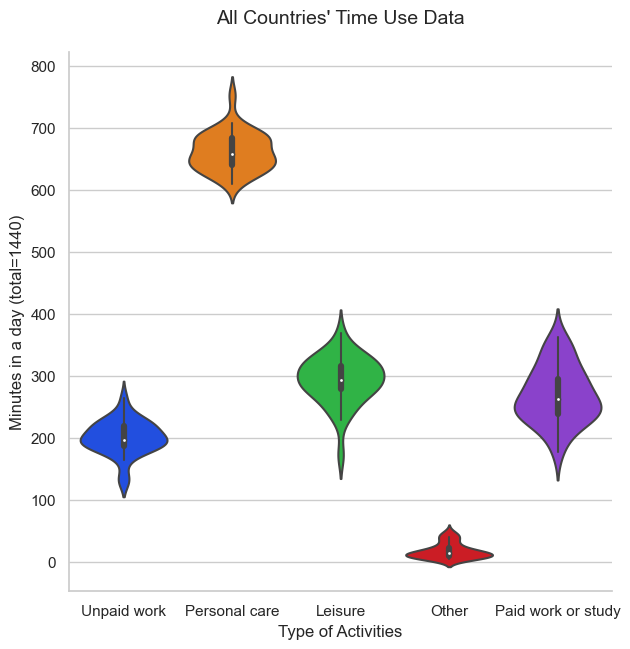

In [52]:
# Setting up the aesthetics for the plots

sns.set_theme(style='whitegrid', 
              palette='bright',
              font_scale = 1             
             )
 
plt.figure(figsize=(7, 7))

# create violin plot for distibution of minutes for each activity

total_plot = sns.violinplot(
    y='Value', 
    x='Description',
    alpha=.4,
    scale='count',
    data= totals_df
)

sns.despine()
total_plot.set(
    xlabel="Type of Activities",
    ylabel="Minutes in a day (total=1440)"    
)

plt.title("All Countries' Time Use Data\n", fontsize=14);

### Plot Discussion

The plot shows distribution of time taken for each time use activity  

1. most time is spent on personal care, which includes sleep
2. 'leisure' and 'paid work or study' are equivalent in the range of time spent on those activities
3. however the median for leisure is slightly higher than the median for 'paid work or study'
3. less time is spent on 'unpaid work' than 'paid work or study'


In [53]:
# Define function to print the 5 countries
# with highest values for given time use activities 


def highest(df):
    
    desc= ['Paid work or study', 'Unpaid work', 'Leisure']
    
    # identify rows matching description and sort rows highest to lowest by value
    for d in desc:
        subset = df.loc[df['Description'] == d].sort_values('Value', ascending=False)   
                                                                                       
        # save top 5 countries  
        high = subset[['Country', 'Sex']].values[0:5]  
        
        # print description statement in bold 
        print(f'\033[1mTop 5 countries recording highest time for {d}\033[0m: ')                     
        
        c=0
        # loop through countries to print
        # position, country, sex category separated by tabs
           
        for i in high:                                                                  
            c+=1
            print('{}  {}{}'.format(c, i[0].ljust(14), i[1].ljust(5)))
  
        # print gap between listed descriptions       
        print('-------------------------')                                            
        

In [54]:
# apply highest function to totals_df - 
# 5 countries with highest time for each activity

highest(totals_df)

Top 5 countries recording highest time for Paid work or study: 
1  Japan         Total
2  Mexico        Total
3  South Korea   Total
4  China         Total
5  Latvia        Total
-------------------------
Top 5 countries recording highest time for Unpaid work: 
1  Mexico        Total
2  Australia     Total
3  Slovenia      Total
4  Hungary       Total
5  Poland        Total
-------------------------
Top 5 countries recording highest time for Leisure: 
1  Norway        Total
2  Greece        Total
3  Belgium       Total
4  Germany       Total
5  Finland       Total
-------------------------


### Note
Looking at the 5 countries recording the highest time for 'Unpaid work', 'Paid work or study' and 'Leisure'
1. Mexico recorded highest 'Unpaid work' time and second highest for 'Paid work or study' time
2. Australia is the only country in the high 'income group to be in the top 5 countries for 'unpaid work'
3. for 'Paid work or study' 3 Asian countries are in the top 5  - Japan, South Korea and China 
4. Norway record highest 'Leisure' time, over 25 minutes per day more than any other country
5. top 5 countries for 'Leisure' time are all European, 4 of the countries are high income level 
 

In [55]:
# define function to print the 5 countries
# with lowest values for time use activities in a dataframe

def lowest(df):
    
    desc= ['Paid work or study', 'Unpaid work', 'Leisure']
    
    # identify rows matching description
    # sort rows lowest to highest by value
    for d in desc:
        subset = df.loc[df['Description'] == d].sort_values('Value', ascending=True)   
                                                                                       
        # save top 5 countries
        low = subset[['Country', 'Sex']].values[0:5]                                   
        
        # print description statement in bold
        print(f'\033[1mTop 5 countries recording lowest time for {d}\033[0m: ')                     
        
        c=0
        # loop through countries to print - 
        # position, country, sex category separated by tabs
        for i in low:                                                                  
            c+=1
              
            print('{}  {}{}'.format(c, i[0].ljust(14), i[1].ljust(5)))
        
        # print gap between listed descriptions
        print('-------------------------')                                             
        
 

In [56]:
# apply lowest function to totals_df  - 
# 5 countries with lowest time for each activity

lowest(totals_df)

Top 5 countries recording lowest time for Paid work or study: 
1  Italy         Total
2  Spain         Total
3  France        Total
4  Denmark       Total
5  Greece        Total
-------------------------
Top 5 countries recording lowest time for Unpaid work: 
1  South Korea   Total
2  Japan         Total
3  China         Total
4  Luxembourg    Total
5  Greece        Total
-------------------------
Top 5 countries recording lowest time for Leisure: 
1  Mexico        Total
2  China         Total
3  Portugal      Total
4  Lithuania     Total
5  India         Total
-------------------------


### Note
Looking at the countries recording the lowest time for  'Unpaid work', 'Paid work or study' and 'Leisure'
1. South Korea recorded the lowest time for unpaid work, followed by 2 other Asian countries - Japan, China
2. the highest income country, Luxembourg, is the 4th lowest for unpaid work
3. the lowest 5 countries for paid work or study are all from Europe  
4. Mexico recorded the lowest time for 'Leisure', almost an hour less than second places China
 

In [57]:
gender_df.head()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags,Region,GDP_per_Capita,Income group
1,AUS,Australia,UPW,Unpaid work,Women,15-64,Latest year,311.00000,D,Difference in methodology,Oceania,64964,High
2,AUS,Australia,UPW,Unpaid work,Men,15-64,Latest year,171.59583,D,Difference in methodology,Oceania,64964,High
4,AUT,Austria,UPW,Unpaid work,Women,15-64,Latest year,269.17200,NaN,NaN,Europe,56802,High
5,AUT,Austria,UPW,Unpaid work,Men,15-64,Latest year,135.28297,NaN,NaN,Europe,56802,High
7,BEL,Belgium,UPW,Unpaid work,Women,15-64,Latest year,237.32297,NaN,NaN,Europe,53377,High


## Data transformation


To aggregate values for each activity for all countries and split by gender
- groupby to group values by description
 



In [58]:
#  aggregate the mean, minimum and maximum values for men and women by activity type

gender_value_agg = gender_df.groupby(['Description', 'Sex'])[['Value']].agg(['mean', 'max', 'min'])

In [59]:
gender_value_agg

Value                        
                                mean         max         min
Description        Sex                                      
Leisure            Men    315.548463  375.390320  186.602160
                   Women  271.378712  365.848210  159.110860
Other              Men     16.219265   45.119598    3.260380
                   Women   18.129394   51.403179    4.466840
Paid work or study Men    321.488568  478.332980  220.813960
                   Women  217.510852  291.000000  133.119720
Personal care      Men    655.779827  742.955380  594.729860
                   Women  666.999175  760.888060  623.132390
Unpaid work        Men    131.502477  186.136080   40.767059
                   Women  267.132256  396.356540  215.008940

## Data Visualisation

- plot to show distibution of values, grouped by description and sex

In [60]:
import warnings
warnings.filterwarnings('ignore')

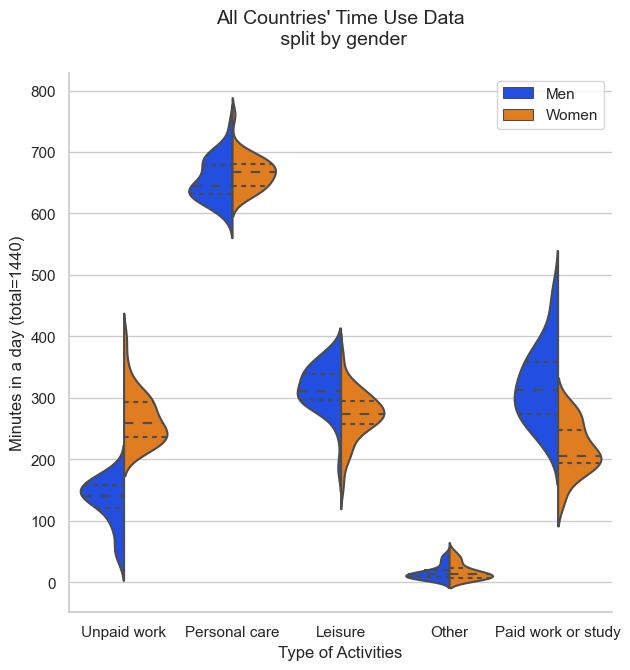

In [61]:
# Setting up the aesthetics for the plots


plt.figure(figsize=(7, 7))

# create violin plot for distibution of minutes for each activity

gender_plot = sns.violinplot(
    y='Value', 
    x='Description', 
    palette='bright',
    hue='Sex',
    alpha=.5,
    split=True,
    scale='count',
    gap = 10,
    inner='quart',
    hue_order=['Men', 'Women'],
    data= gender_df
)
sns.despine()
gender_plot.set(
    xlabel="Type of Activities",
    ylabel="Minutes in a day (total=1440)",
    title="Distribution of time spent on activities for all countries,   "
)
plt.legend(title='')   #remove legend title 
plt.title("All Countries' Time Use Data\n split by gender\n", fontsize=14);

### Plot Discussion

The plot shows distribution of time taken for each time use activity by gender 

1. time for 'personal care' is relatively equal between men and women
2. when split by gender there is now a noticeable difference in range for 'leisure' and 'paid work or study' 
3. men recorded more time for 'paid work or study' and 'leisure' than women
4. the biggest difference between men and women is time for 'unpaid work', with women recording more minutes than men


In [62]:
# apply highest function to gender_df - 
# 5 countries with highest time for each activity 

highest(gender_df)

Top 5 countries recording highest time for Paid work or study: 
1  Mexico        Men  
2  Japan         Men  
3  South Korea   Men  
4  India         Men  
5  China         Men  
-------------------------
Top 5 countries recording highest time for Unpaid work: 
1  Mexico        Women
2  India         Women
3  Portugal      Women
4  Australia     Women
5  Italy         Women
-------------------------
Top 5 countries recording highest time for Leisure: 
1  Greece        Men  
2  Norway        Men  
3  Italy         Men  
4  Norway        Women
5  Belgium       Men  
-------------------------


### Note
Looking at the 5 countries recording the highest time for activities by gender
1. Mexico men top recorded highest 'Paid work or study' time and Mexico women highest for 'Unpaid work' time
2. Australia women are the only high 'income group to be in the top 5 countries for 'unpaid work'
3. for 'Paid work or study' 4 Asian countries (men) are in the top 5
4. Greece (men) record highest 'Leisure' time
5. Norway's men and women are in the top 5 entries for leisure time
6. Norway's women are the only women in the top 5 for leisure time
7. top 5 entries for 'Leisure' time are all from European countries 
 

In [63]:
# apply lowest function to gender_df  - 
# 5 countries with lowest time for each activity 

lowest(gender_df)

Top 5 countries recording lowest time for Paid work or study: 
1  Italy         Women
2  Turkey        Women
3  Spain         Women
4  Australia     Women
5  France        Women
-------------------------
Top 5 countries recording lowest time for Unpaid work: 
1  Japan         Men  
2  South Korea   Men  
3  India         Men  
4  Turkey        Men  
5  China         Men  
-------------------------
Top 5 countries recording lowest time for Leisure: 
1  Mexico        Women
2  Mexico        Men  
3  Portugal      Women
4  China         Women
5  Lithuania     Women
-------------------------


### Note
Looking at the countries recording the lowest time for activities by gender
1. the lowest times for unpaid work are all men, predominantly from Asian countries 
2. the lowest entries for paid work or study are all women  
3. Mexico women recorded the lowest time for 'Leisure', followed by Mexico men, the only men in the group
 

In [64]:
print(gender_df['Region'].unique())
print(gender_df['Income group'].unique())


['Oceania' 'Europe' 'Americas' 'Asia' 'Africa']
['High' 'Medium' 'Low']


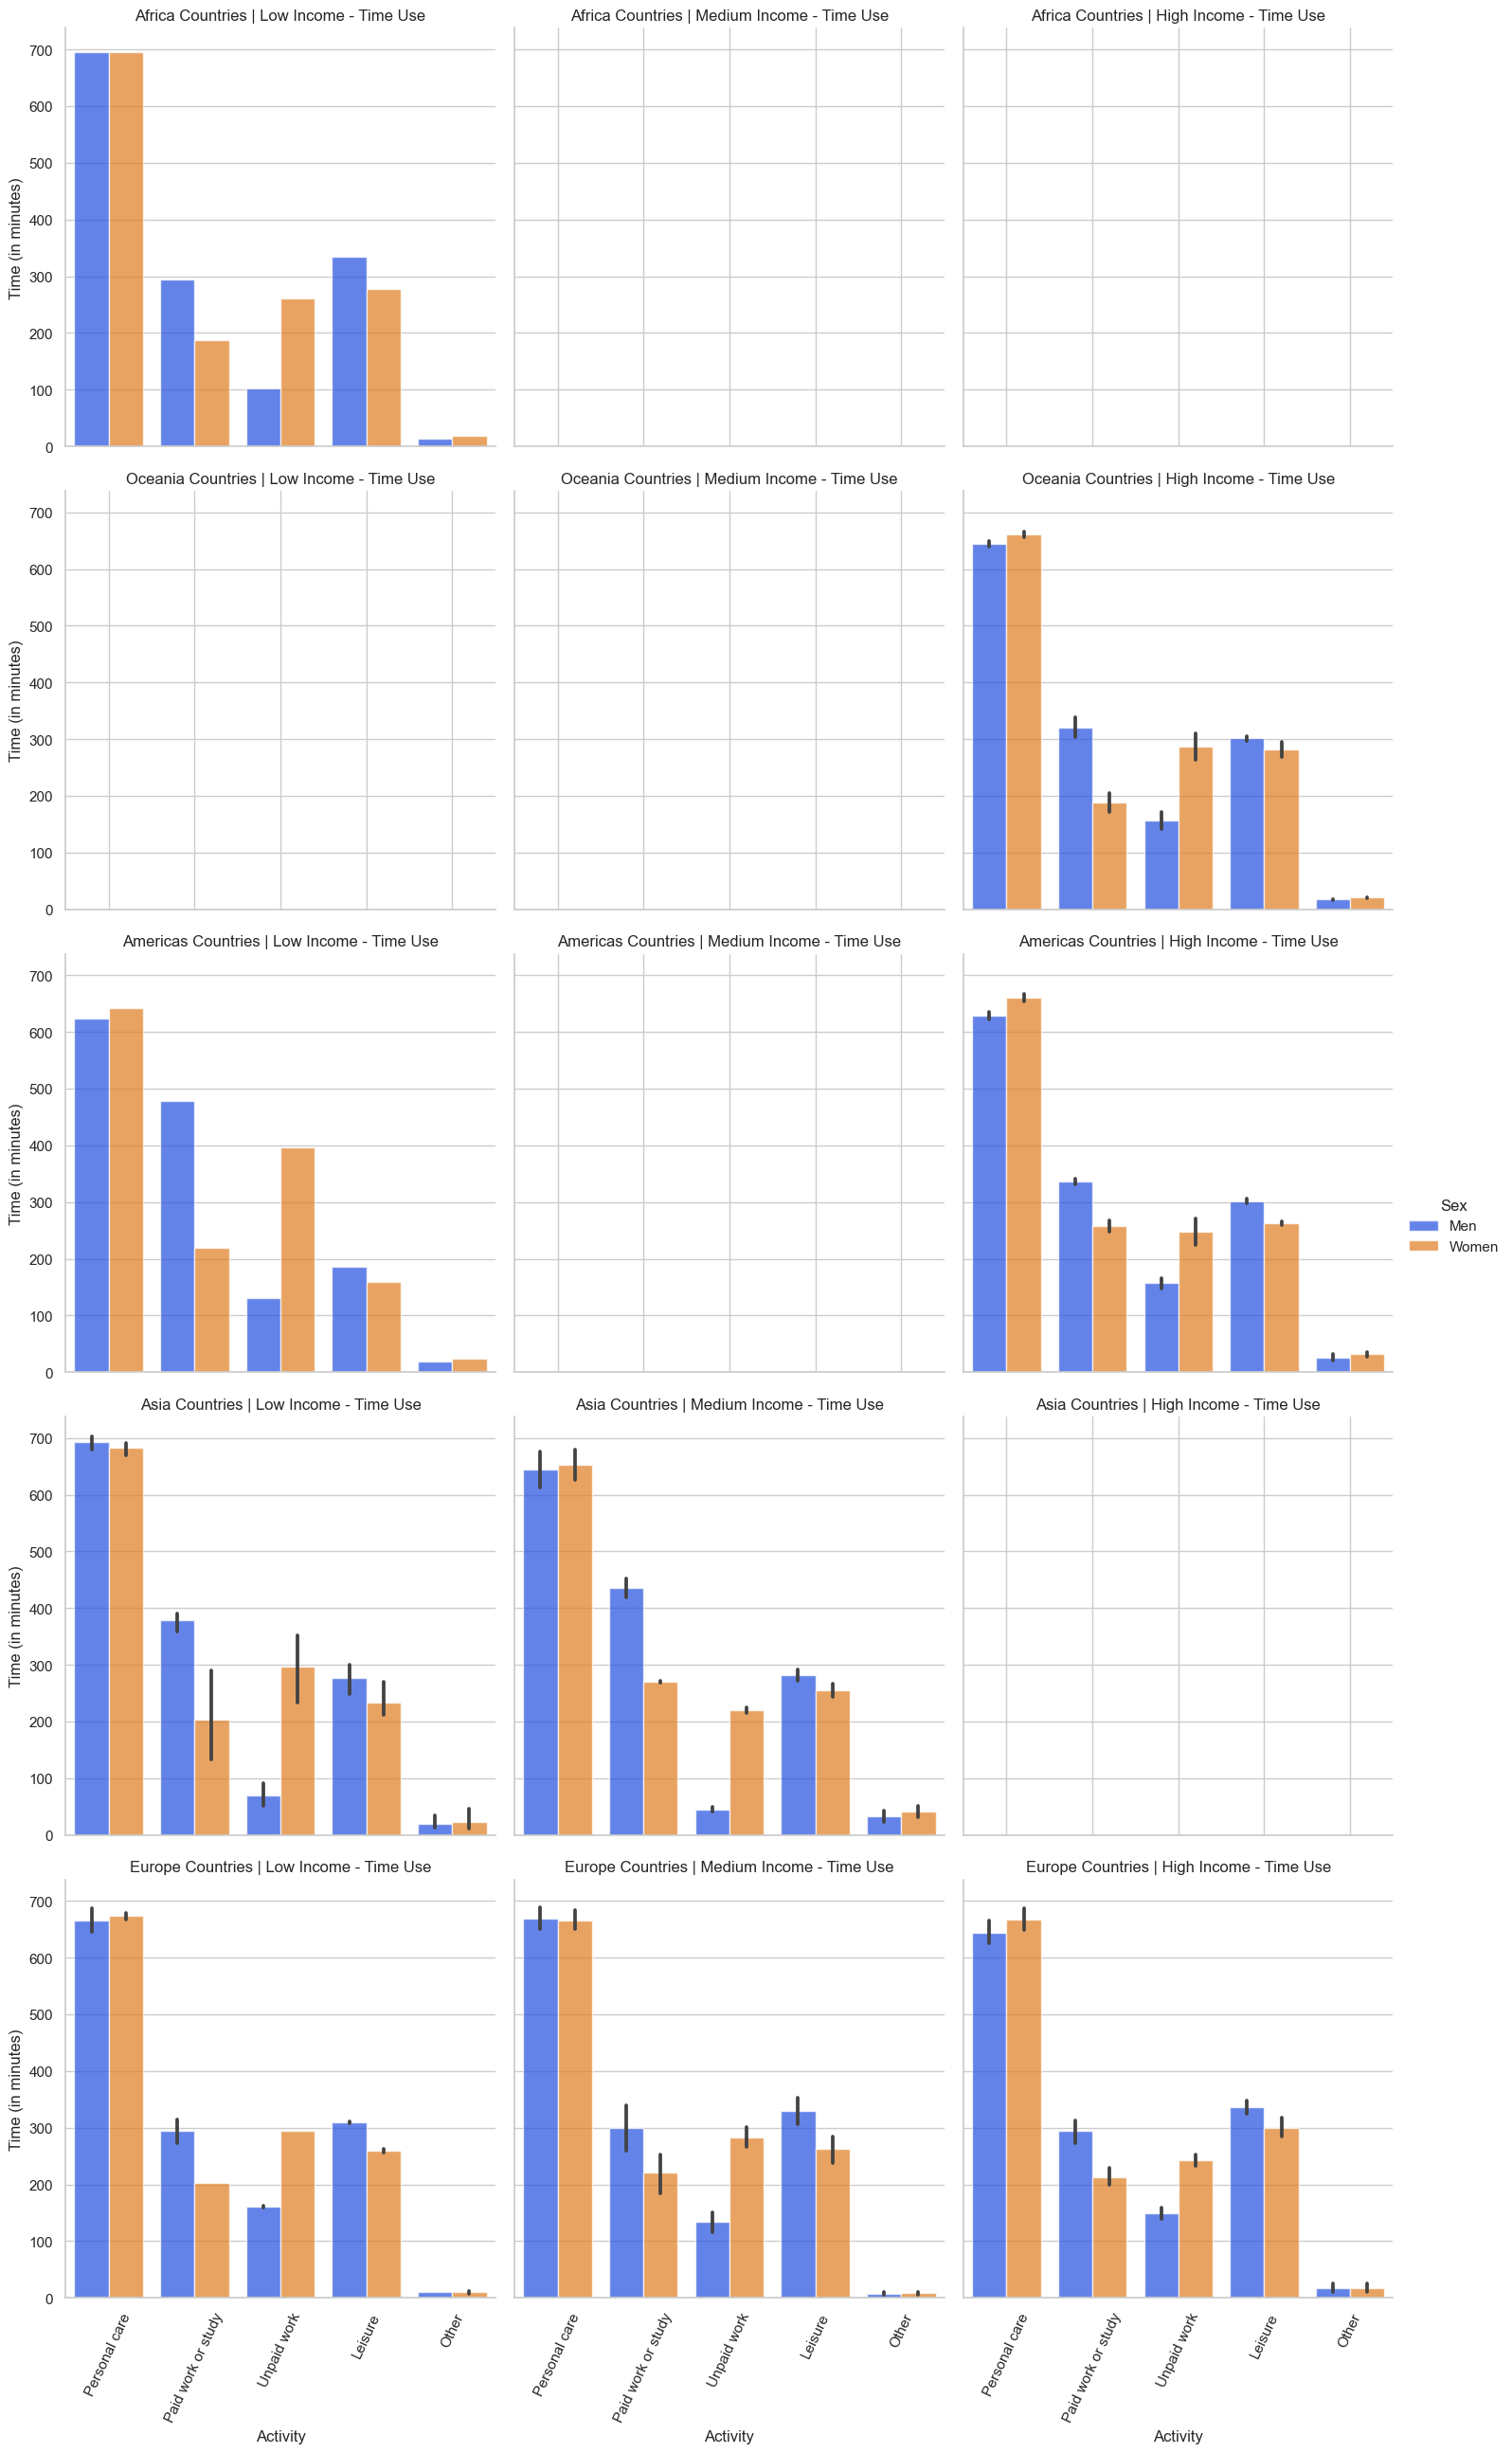

In [65]:
# bar plots of time use data
# split by region and income group  

region_plot = sns.catplot(
    data= gender_df,
    row='Region',
    col='Income group',
    row_order=['Africa', 'Oceania', 'Americas', 'Asia', 'Europe'],
    col_order=['Low', 'Medium', 'High'],
    kind='bar',
    y='Value', 
    x='Description',
    hue='Sex',
    palette='bright',
    alpha=.7,
    order=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    hue_order=['Men', 'Women']    
)

region_plot.set_titles(
    col_template='{col_name} Income - Time Use',
    row_template='{row_name} Countries'
)
region_plot.set_xticklabels(
    labels=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    rotation=65)
region_plot.set(xlabel='Activity',
                ylabel='Time (in minutes)'
         
          );



### Plot Discussion

The subplots show time use data by region, income group and gender 

1. Asian countries/low income group shows greatest variance for women's activities, as evidenced by the error bar.  
2. across income groups for European countries women's unpaid work goes down as income level rises -  this also appears to occur for other regions but only Europe has the 3 income groups
3. time for paid work or study is highest for Asian countries men and increases with income
4. for all groups men have more time for 'leisure' than women

- Explore Asian countries/low income women group further to understand variance

- Explore how leisure time varies across countries for men and women would be informative to understand gender equality or inequality


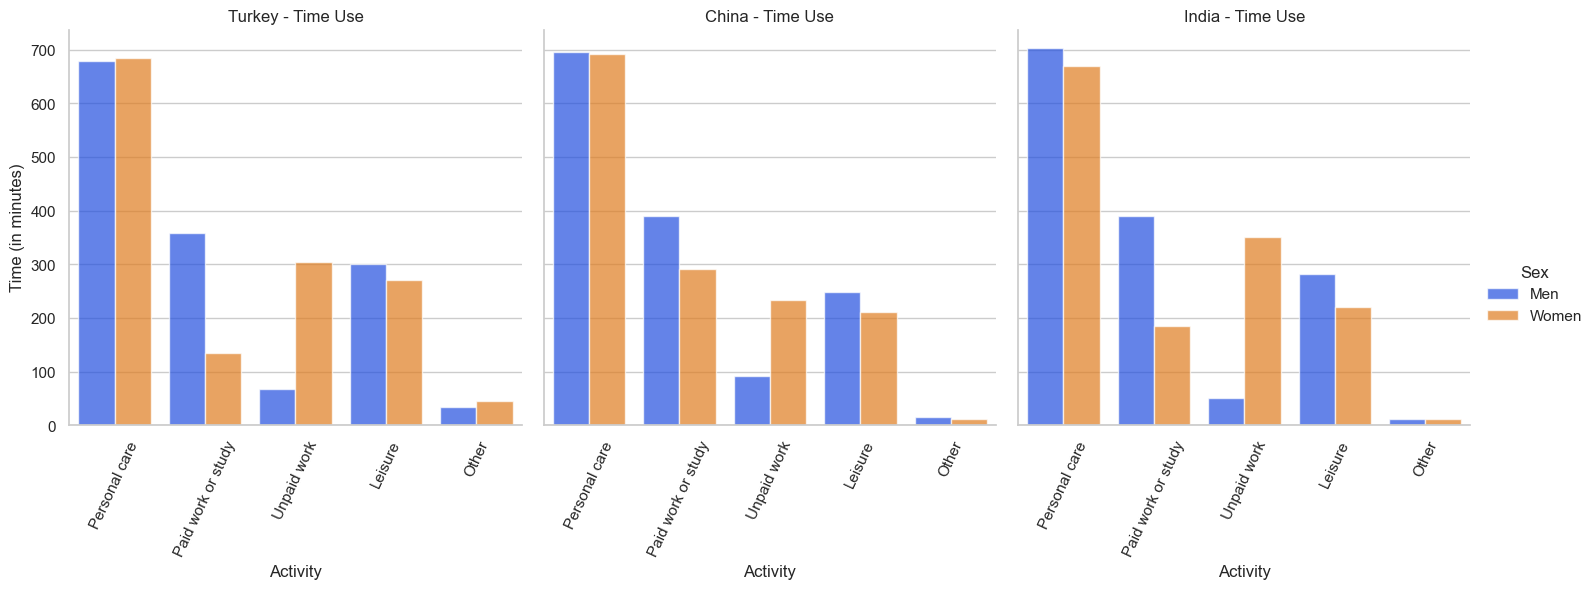

In [66]:
# create bar plots of time use data for low income Asian countries
   

asia_plot = sns.catplot(
    data= gender_df[(gender_df['Region']=='Asia') & (gender_df['Income group']=='Low')],
    col='Country',
    col_wrap=3,    
    kind='bar',
    y='Value', 
    x='Description',
    hue='Sex',
    palette='bright',
    alpha=.7,
    order=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    hue_order=['Men', 'Women']    
)

asia_plot.set_titles(
    col_template='{col_name} - Time Use',
    
)
asia_plot.set_xticklabels(
    labels=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    rotation=65)
asia_plot.set(xlabel='Activity',
                ylabel='Time (in minutes)'
                
          );


### Plot Discussion

The subplots show time use data for low income Asian countries, as there was noticeable variance in time for women's activities which is not the case for their male counterparts.
1. China women's time for paid work and study is higher than unpaid work
2. The reverse is true for India and Turkey

Further explore countries with highest and lowest women's activity times  

In [67]:
# apply highest function to gender_df selecting just women - 
# 5 countries with highest time for each activity 

highest(gender_df[gender_df['Sex']== 'Women'])

Top 5 countries recording highest time for Paid work or study: 
1  China         Women
2  Latvia        Women
3  Lithuania     Women
4  Sweden        Women
5  Japan         Women
-------------------------
Top 5 countries recording highest time for Unpaid work: 
1  Mexico        Women
2  India         Women
3  Portugal      Women
4  Australia     Women
5  Italy         Women
-------------------------
Top 5 countries recording highest time for Leisure: 
1  Norway        Women
2  Denmark       Women
3  Belgium       Women
4  Germany       Women
5  Greece        Women
-------------------------


In [68]:
# apply lowest function to gender_df selecting just women - 
# 5 countries with lowest time for each activity 

lowest(gender_df[gender_df['Sex']== 'Women'])

Top 5 countries recording lowest time for Paid work or study: 
1  Italy         Women
2  Turkey        Women
3  Spain         Women
4  Australia     Women
5  France        Women
-------------------------
Top 5 countries recording lowest time for Unpaid work: 
1  South Korea   Women
2  Sweden        Women
3  Canada        Women
4  France        Women
5  Japan         Women
-------------------------
Top 5 countries recording lowest time for Leisure: 
1  Mexico        Women
2  Portugal      Women
3  China         Women
4  Lithuania     Women
5  India         Women
-------------------------


### Note
Low income Asian countries' noticeable variance in women's activity times was because the group includes extreme activity times: 

1. India's women recorded the 2nd highest for unpaid work 
2. China's women are the highest time for paid work while Turkey's women are the second lowest for paid work 
3. India and China women are in the lowest 5 for leisure time

Check to see if other countries recorded women's time for paid work or study was greater than unpaid work

## Data transformation

Each activity in time_cap_df is under the column 'Description', move activities to column headings
- groupby to group values by country, sex and description
- unstack so each activity has a column name
- grouping allows for comparisons by country and sex



In [69]:
# group dataframe by region, country and gender

group_df = time_cap_df.groupby(['Region','Country','Income group','GDP_per_Capita', 'Sex','Description'])['Value'].agg('mean').unstack()
#group_df.head()

In [70]:
# reset grouped datafarame index

group_df.reset_index(inplace=True)
group_df.rename_axis(None, axis=1, inplace=True)


In [71]:
# Filter group_df to give entries for women where time for paid work is more than unpaid work

group_df[(group_df['Paid work or study'] > group_df['Unpaid work']) & (group_df['Sex'] == 'Women')]

,Region,Country,Income group,GDP_per_Capita,Sex,Leisure,Other,Paid work or study,Personal care,Unpaid work
5,Americas,Canada,High,52722,Women,259.66452,35.634060,268.28391,652.76111,223.65640
14,Asia,China,Low,13721,Women,211.00000,12.000000,291.00000,692.00000,234.00000
20,Asia,Japan,Medium,35385,Women,266.19537,51.403179,271.52426,626.42706,224.30183
23,Asia,South Korea,Medium,33393,Women,243.97131,31.756468,269.38647,679.87683,215.00894
62,Europe,Latvia,Medium,25136,Women,249.24818,5.335833,288.46832,643.69354,253.25412
89,Europe,Sweden,High,55395,Women,306.21265,5.003475,275.19110,633.43988,220.15288


In [72]:
# Filter group_df to give entries for men where time for paid work is more than unpaid work

group_df[(group_df['Paid work or study'] < group_df['Unpaid work']) & (group_df['Sex'] == 'Men')]

,Region,Country,Income group,GDP_per_Capita,Sex,Leisure,Other,Paid work or study,Personal care,Unpaid work


### Note

- Out of the 33 countries in the Time Use dataset, 6 countries show women's time for paid work is more than unpaid work, as is the case for men from all countries
   - Canada
   - China
   - Japan
   - South Korea
   - Latvia
   - Sweden 
        


### Note
- Explore gender difference of time for leisure - as a measure of gender equality for the 33 countries included in the survey data

## Data transformation

Pivot group_df to compare leisure time for men and women, so:
                   
                   -rows = country
                   -columns = sex
                   -values = leisure values
 

In [73]:
# create a pivot table to give leisure values by country and gender

diff_df = group_df.pivot(index = ('Region', 'Country','Income group', 'GDP_per_Capita'), columns = 'Sex', values= 'Leisure')
diff_df

Sex                                                        Men      Total  \
Region   Country        Income group GDP_per_Capita                         
Africa   South Africa   Low          6485            334.19431  305.89819   
Americas Canada         High         52722           297.80487  278.93344   
         Mexico         Low          12673           186.60216  171.92743   
         United States  High         80034           305.76767  285.52322   
Asia     China          Low          13721           248.00000  227.84178   
         India          Low          2601            282.64328  253.99612   
         Japan          Medium       35385           291.82288  278.31256   
         South Korea    Medium       33393           272.44778  258.26019   
         Turkey         Low          11931           300.95496  285.73074   
Europe   Austria        High         56802           308.09048  291.20932   
         Belgium        High         53377           365.17313  339.35016   
         Denmark        High         68827           339.54260  328.84482   
         Estonia        Medium       31209           345.31406  309.40707   
         Finland        High         54351           358.73950  330.98871   
         France         High         44408           319.13080  293.54263   
         Germany        High         51383           346.25378  331.15182   
         Greece         Medium       22595           375.39032  341.39120   
         Hungary        Low          19385           308.15710  281.34970   
         Ireland        High         114581          337.57703  312.31158   
         Italy          Medium       36812           366.09576  323.25861   
         Latvia         Medium       25136           290.47876  268.84131   
         Lithuania      Medium       28094           282.19785  246.60680   
         Luxembourg     High         132372          299.04138  276.38571   
         Netherlands    High         61098           329.58533  314.76401   
         Norway         High         101103          370.33890  368.24329   
         Poland         Low          19912           310.96182  286.15439   
         Portugal       Medium       26012           289.14047  240.67133   
         Slovenia       Medium       32214           336.93594  310.56866   
         Spain          Medium       31223           347.16925  316.04926   
         Sweden         High         55395           338.00000  321.48456   
         United Kingdom High         46371           326.51575  305.53094   
Oceania  Australia      High         64964           297.03137  281.19528   
         New Zealand    High         48826           306.00000  301.00000   

Sex                                                      Women  
Region   Country        Income group GDP_per_Capita             
Africa   South Africa   Low          6485            277.60207  
Americas Canada         High         52722           259.66452  
         Mexico         Low          12673           159.11086  
         United States  High         80034           265.77472  
Asia     China          Low          13721           211.00000  
         India          Low          2601            220.94849  
         Japan          Medium       35385           266.19537  
         South Korea    Medium       33393           243.97131  
         Turkey         Low          11931           270.44739  
Europe   Austria        High         56802           274.27515  
         Belgium        High         53377           316.70667  
         Denmark        High         68827           319.61255  
         Estonia        Medium       31209           277.80951  
         Finland        High         54351           303.60413  
         France         High         44408           269.74338  
         Germany        High         51383           315.76834  
         Greece         Medium       22595           310.60394  
         Hungary        Low          19385           256.84116  
    

In [74]:
# add a column that gives the difference in leisure values for men and women
# reset index

diff_df['Difference'] = round(diff_df['Men'] - diff_df['Women'], 1)
diff_df.drop('Total',axis=1, inplace=True )
diff_df.reset_index(inplace=True)
diff_df.rename_axis(None, axis=1, inplace=True)
diff_df.head() 


,Region,Country,Income group,GDP_per_Capita,Men,Women,Difference
0,Africa,South Africa,Low,6485,334.19431,277.60207,56.6
1,Americas,Canada,High,52722,297.80487,259.66452,38.1
2,Americas,Mexico,Low,12673,186.60216,159.11086,27.5
3,Americas,United States,High,80034,305.76767,265.77472,40.0
4,Asia,China,Low,13721,248.00000,211.00000,37.0


In [75]:
# display stats for difference in leisure activity

diff_df['Difference'].describe()


count    33.000000
mean     44.169697
std      19.183741
min       4.500000
25%      30.500000
50%      41.800000
75%      55.100000
max      89.400000
Name: Difference, dtype: float64

<Figure size 600x600 with 0 Axes>

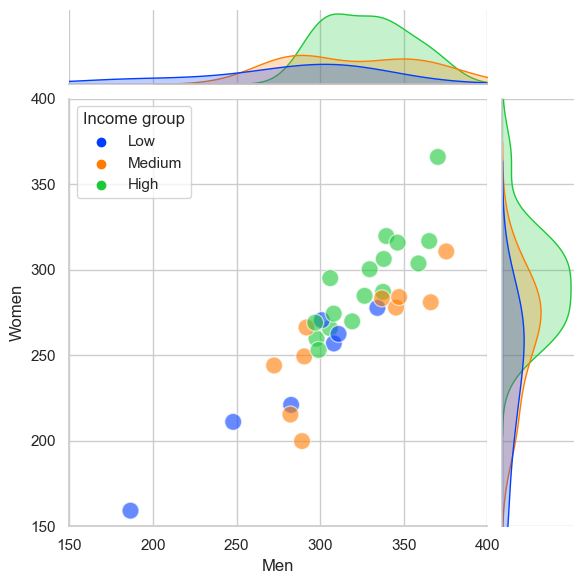

In [76]:
# create joint plot 
# scatter plot - men vs women leisure time for each country
# distribution for men and women leisure activity
# colour of plots also show income level 


plt.figure(figsize=(6, 6))


leis_joint = sns.jointplot(
    data= diff_df,
    palette='bright',
    x= 'Men',
    y= 'Women',
    xlim=(150,400),
    ylim=(150,400),     
    s=150,
    hue='Income group',
    hue_order=['Low', 'Medium', 'High'],
    alpha=.6    
)


plt.show();



In [77]:
# determine correlation coefficient

diff_df['Women'].corr(diff_df['Men'])

0.8803956399547344

###  Plot Discussion
 Joint plot shows:

1. a strong positive correlation (0.88 correlation coefficient) between men and women's leisure time; as men's leisure time increase so does women's 
2. men and women from higher income countries recorded leisure time clustered at the higher range - 250 - 375m ins per day
3. low and middle income countries have a wider range of plots for men and women
4. middle income countries leisure range 200 - 375 mins per day
5. low income countries leisure range 150 -325 mins per day
                        
 
While there is a positive correlation for men and women's leisure activity, women's values appear lower than men's

The following plot explores this further by including a reference line in a scatter plot of men and women's leisure values


''

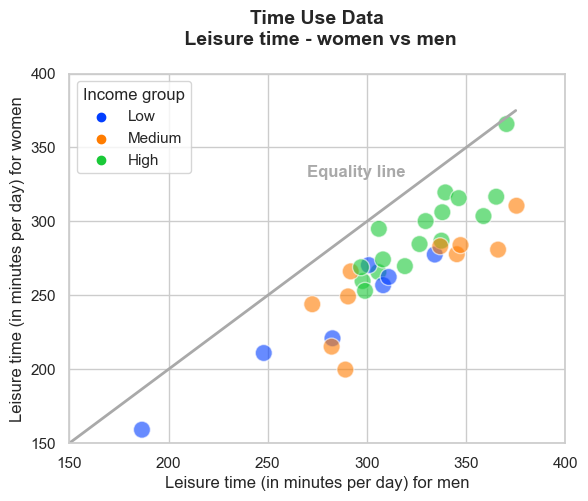

In [78]:
# plot recorded leisure time for men and women
# on a scatter plot with perfect correlation line as an equality reference line, 
# if leisure time is equal for men and women plots will be on or close to the line

sns.set_theme(style='whitegrid', palette='bright')

#plot line to illustrate where equality plots would be
plt.plot([0, 250, 375], [0, 250, 375], 'darkgrey', linewidth=2)  


#create scatter plot
leis_corr = sns.scatterplot(     
    data= diff_df,
    palette='bright',
    x= 'Men',
    y= 'Women',
    s=150,
    hue='Income group',  
    hue_order=['Low', 'Medium', 'High'],
    alpha=.6,
    
)


# set label, title and x & y limits
leis_corr.set(                                     
    xlabel='Leisure time (in minutes per day) for men',
    ylabel='Leisure time (in minutes per day) for women',
    xlim=(150,400),
    ylim=(150,400) 
)
# format plot title 
plt.title('Time Use Data\n Leisure time - women vs men\n', fontweight='bold', fontsize=14)

#line label
leis_corr.text(270, 330, 'Equality line', color='darkgrey', fontweight='bold') 
;



### Note
1. no points fall on the reference line
2. all points are below the reference line 
3. all countries recorded men had more leisure time than women
4. the countries closer to the line (equality) are high income level
5. interestingly the countries furthest away from the reference line are medium income countries

The following plot explores these findings further and orders countries by the difference in men and women's time for leisure

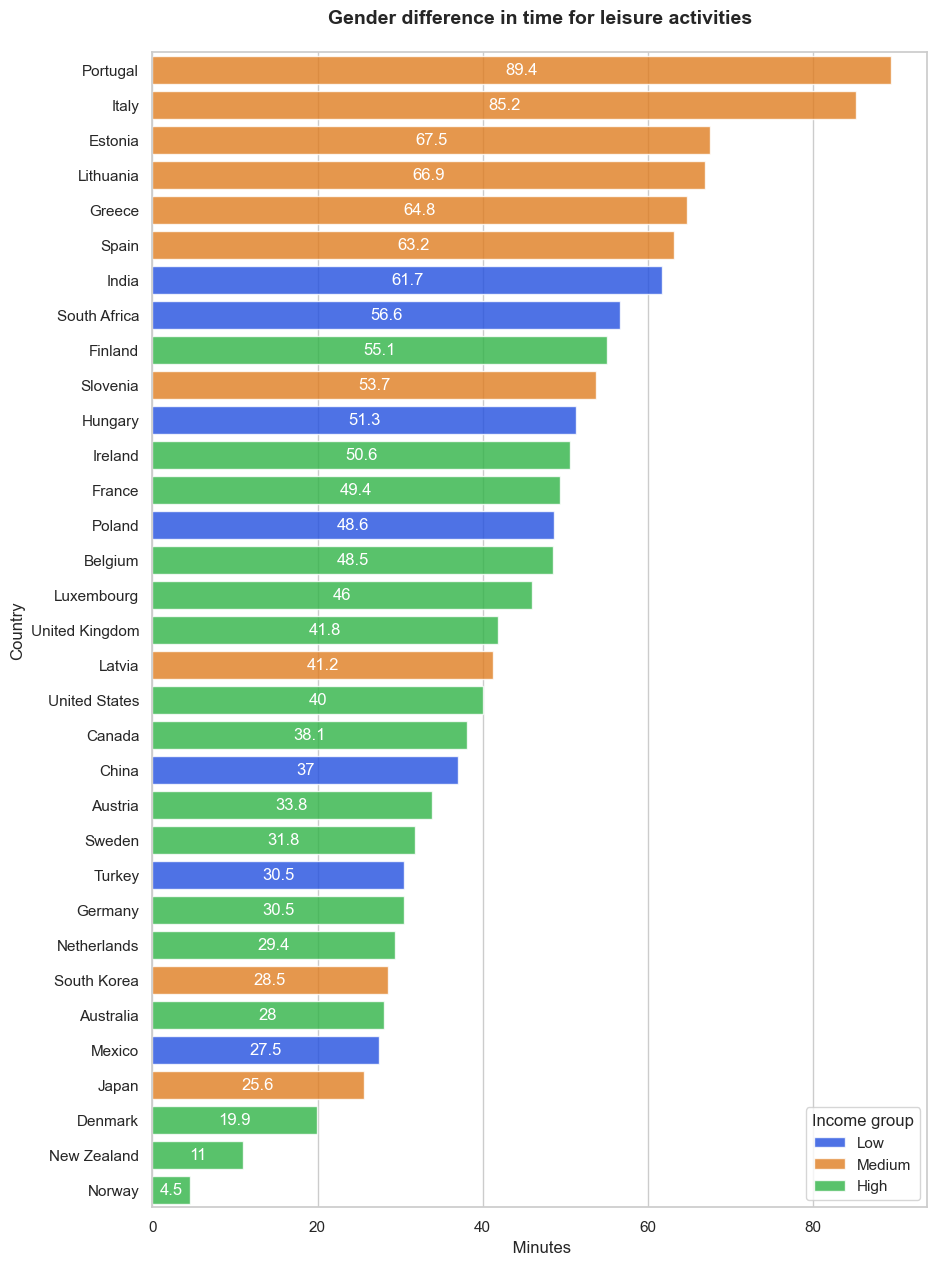

In [79]:
# plot bar chart to show leisure time gender difference 
# in minutes per day 

# set plot size
plt.figure(figsize=(10, 15))

#create bar plot
diff_plot = sns.barplot(x='Difference',
                        y='Country', 
                        hue='Income group',
                        dodge=False, 
                        hue_order=['Low', 'Medium', 'High'],
                        alpha=.8,
                        data=diff_df.sort_values('Difference', ascending=False)                                       
                     )
# set x label
diff_plot.set(xlabel=' Minutes')

# format plot title
plt.title('Gender difference in time for leisure activities\n', fontweight='bold', fontsize=14)

# loop to iterate through the list of
# containers and assign each bar a different label

for i in diff_plot.containers:
    diff_plot.bar_label(i,
                       label_type='center',
                        color='w',                       
                       );
    


 

###  Plot Discussion
The bar plot shows the difference in leisure time between men and women varies greatly between countries:
1. all differences are positive, meaning all countries had higher mean leisure time recorded for men than women; equality in leisure time would return 0 difference
2. Mexico is the 5th lowest gender difference (lowest difference for low income countries), note previously Mexico ranked in top 5 for paid and unpaid work and lowest for leisure
3. the top 6 countries for highest leisure time gender difference are all European and medium income countries
4. the highest difference was Portugal 89.36 mins per day
5. the lowest difference was Norway 4.49 mins per day

It would be simplistic to explain the varied gender differences for leisure solely as countries' gender inequality.  It is worth further exploration to compare the countries with highest and lowest leisure time gender difference, before drawing any conclusions.  


In [80]:
# add column to dataframe giving percentage of day for Time Use data
# % of day is more relatable then minutes 

def percentage(x):
    return round(x/1440*100, 2)

gender_df['% of Day'] = gender_df['Value'].apply(percentage)
gender_df.tail()

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Flag Codes,Flags,Region,GDP_per_Capita,Income group,% of Day
489,LUX,Luxembourg,PAW,Paid work or study,Women,15-64,Latest year,238.86639,NaN,NaN,Europe,132372,High,16.59
490,LUX,Luxembourg,PAW,Paid work or study,Men,15-64,Latest year,329.99503,NaN,NaN,Europe,132372,High,22.92
492,LTU,Lithuania,PAW,Paid work or study,Women,15-64,Latest year,279.25739,D,Difference in methodology,Europe,28094,Medium,19.39
493,LTU,Lithuania,PAW,Paid work or study,Men,15-64,Latest year,354.26273,D,Difference in methodology,Europe,28094,Medium,24.60
494,ZAF,South Africa,LEI,Leisure,Women,15-64,Latest year,277.60207,NaN,NaN,Africa,6485,Low,19.28


In [81]:
# aggregate the mean, minimum and maximum % of Day for men and women by activity type


gender_agg_perc = gender_df.groupby(['Description', 'Sex'])[['% of Day']].agg(['mean', 'max', 'min'])


In [82]:
gender_agg_perc

% of Day              
                               mean    max    min
Description        Sex                           
Leisure            Men    21.913333  26.07  12.96
                   Women  18.845758  25.41  11.05
Other              Men     1.126667   3.13   0.23
                   Women   1.258788   3.57   0.31
Paid work or study Men    22.325758  33.22  15.33
                   Women  15.105152  20.21   9.24
Personal care      Men    45.540303  51.59  41.30
                   Women  46.320303  52.84  43.27
Unpaid work        Men     9.132727  12.93   2.83
                   Women  18.550303  27.52  14.93

In [83]:
gender_mean_perc = gender_df.groupby(['Description', 'Sex'])[['% of Day']].agg('mean').unstack()
gender_mean_perc

% of Day           
Sex                       Men      Women
Description                             
Leisure             21.913333  18.845758
Other                1.126667   1.258788
Paid work or study  22.325758  15.105152
Personal care       45.540303  46.320303
Unpaid work          9.132727  18.550303

### Data Visualisation

- plot to show Time Use data as % of day, grouped by sex for countries with extremes in leisure time gender difference

In [84]:
# save names of countries with highest and lowest leisure time gender difference to 2 variables 

low_diff = diff_df.loc[diff_df['Difference']==diff_df['Difference'].min()]['Country'].values[0]
print(low_diff)

high_diff = diff_df.loc[diff_df['Difference']==diff_df['Difference'].max()]['Country'].values[0]
print(high_diff)

Norway
Portugal


''

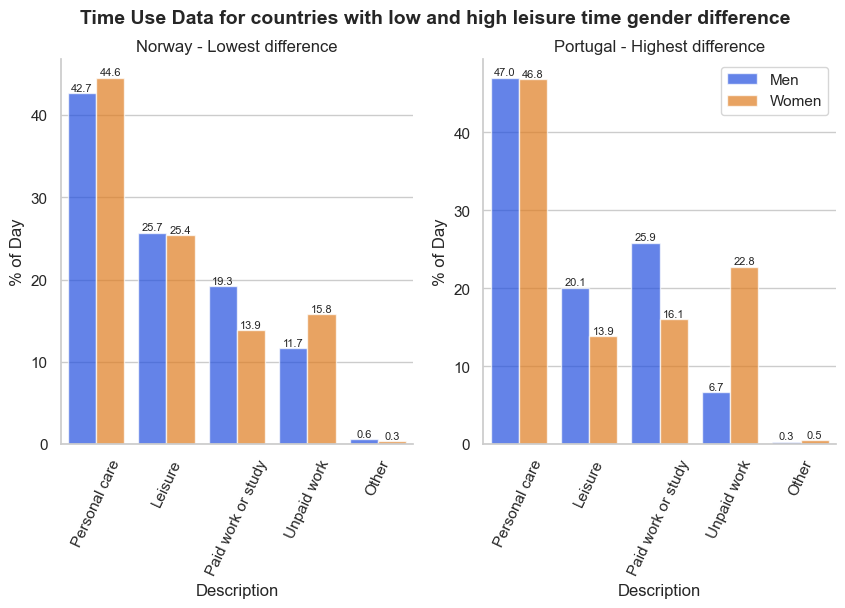

In [85]:

# create subplots of Time Use Data for countries with highest and lowest leisure time gender difference 

high_low, axes = plt.subplots(1,2, figsize=(10,5))     #create 2 empty subplots
high_low.suptitle('Time Use Data for countries with low and high leisure time gender difference\n',\
                  fontsize=14, fontweight='bold')  # set main title

axes[0].set_title(f'{low_diff} - Lowest difference')  #set title for first subplot
axes[0].set_xticklabels(                              #set x labels for first subplot
    labels=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    rotation=65)

axes[1].set_title(f'{high_diff} - Highest difference')  #set title for second subplot
axes[1].set_xticklabels(                                #set x labels second subplot
    labels=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    rotation=65)


# create bar plot for first subplot    
sns.barplot(                                      
    ax=axes[0],
    data=gender_df[gender_df['Country']==low_diff],    
    x='Description',
    y='% of Day',
    palette='bright',
    hue='Sex',
    alpha=.7,
    order=['Personal care', 'Leisure', 'Paid work or study', 'Unpaid work', 'Other'],
    hue_order=['Men', 'Women'],
      
)
# create bar plot for second subplot
sns.barplot(                                      
    ax=axes[1],
    data=gender_df[gender_df['Country']==high_diff],    
    x='Description',
    y='% of Day',
    palette='bright',
    hue='Sex',
    alpha=.7,
    order=['Personal care', 'Leisure', 'Paid work or study', 'Unpaid work', 'Other'],
    hue_order=['Men', 'Women']
)  

axes[0].legend([], frameon=False)  # remove legend from first plot
axes[1].legend(title='')   #remove legend title from second plot 

sns.despine()

# label bars of first plot
for i in axes[0].containers:                      
    axes[0].bar_label(i, fontsize=8, fmt='%.1f')

# label bars of second plot    
for i in axes[1].containers:                      
    axes[1].bar_label(i, fontsize=8, fmt='%.1f')


;

In [86]:
# Norway's Time Use data

select_c('Norway')

,Description,Men,Total,Women
0,Leisure,370.338900,368.243290,365.84821
1,Other,9.243058,7.234495,4.93899
2,Paid work or study,277.382900,241.265060,199.98746
3,Personal care,614.548160,627.272950,641.81549
4,Unpaid work,168.486940,195.984250,227.40991


In [87]:
# Portugal's Time Use data

select_c('Portugal')

,Description,Men,Total,Women
0,Leisure,289.140470,240.671330,199.776540
1,Other,5.031447,6.041958,7.039106
2,Paid work or study,372.327060,295.048950,231.284910
3,Personal care,677.232730,675.692320,673.743040
4,Unpaid work,96.268341,222.545460,328.156430


### Plot Discussion
The plot shows time use data by percentage of day for Norway and Portugal, the lowest and highest countries reporting gender differences for leisure time, respectively
 
1. along with leisure, the difference in paid and unpaid work between men and women is greater for Portugal
1. Combining time for work (paid and unpaid):
    - Portugal women recorded 90 mins more than Portugal men
    - Norway men recorded 18 mins more than Norway women
    

1. Norway men recorded less paid work but more unpaid work compared to Portugal men. 
1. Norway women recorded less paid work and less unpaid work compared to Portugal women. 
1.  
    - combining - men and women, paid work, 
        - Portugal recorded 126 mins more than Norway
         
    - combining - men and women, unpaid work  
        - Portugal recorded 29 more mins than Norway
         
 
1. Norway recorded more time for leisure than Portugal, for men and women
1. Norway men recorded more leisure time than paid work, whereas the opposite is true for Portugal men
1. Norway women recorded more leisure time than unpaid work, whereas the opposite is true for Portugal women


In summary
   
   - Portugal men and women are working (paid and unpaid) more than their Norwegian counterparts, and take less time for leisure
   - Portugal women are working (paid and unpaid) over 2 hours more than Norwegian counterparts and almost half the leisure time.
   - It would appear that Norway men take on more unpaid work and have more time for leisure because they can make a living on less time for paid work, compared to Portugal men.  
   - Portugal men are working more than Norway men, but less than Portugal women

### Note

- Gender difference in time for leisure gives one measure of inequality, however it does not give a complete picture
- true gender equality would be equality across all activity measures

In [88]:
# pivot gender_df to calculate gender difference in times for all activities
# difference is squared and square rooted to remove negative values


gender_diff = gender_df.pivot_table(index=('Country', 'Income group','Description'), columns='Sex', values='Value')
gender_diff['Difference'] = round(np.sqrt((gender_diff['Men'] - gender_diff['Women'])**2), 1)



In [89]:
# use groupby to sum all activity differences for each country

country_diff = gender_diff.groupby(['Country', 'Income group'])[['Difference']].sum()
country_diff.reset_index(inplace=True) 
country_diff.rename_axis(None, axis=1, inplace=True)

country_diff

,Country,Income group,Difference
0,Australia,High,320.1
1,Austria,High,301.7
2,Belgium,High,245.6
3,Canada,High,220.7
4,China,Low,286.0
5,Denmark,High,174.0
6,Estonia,Medium,178.0
7,Finland,High,197.8
8,France,High,218.3
9,Germany,High,229.1


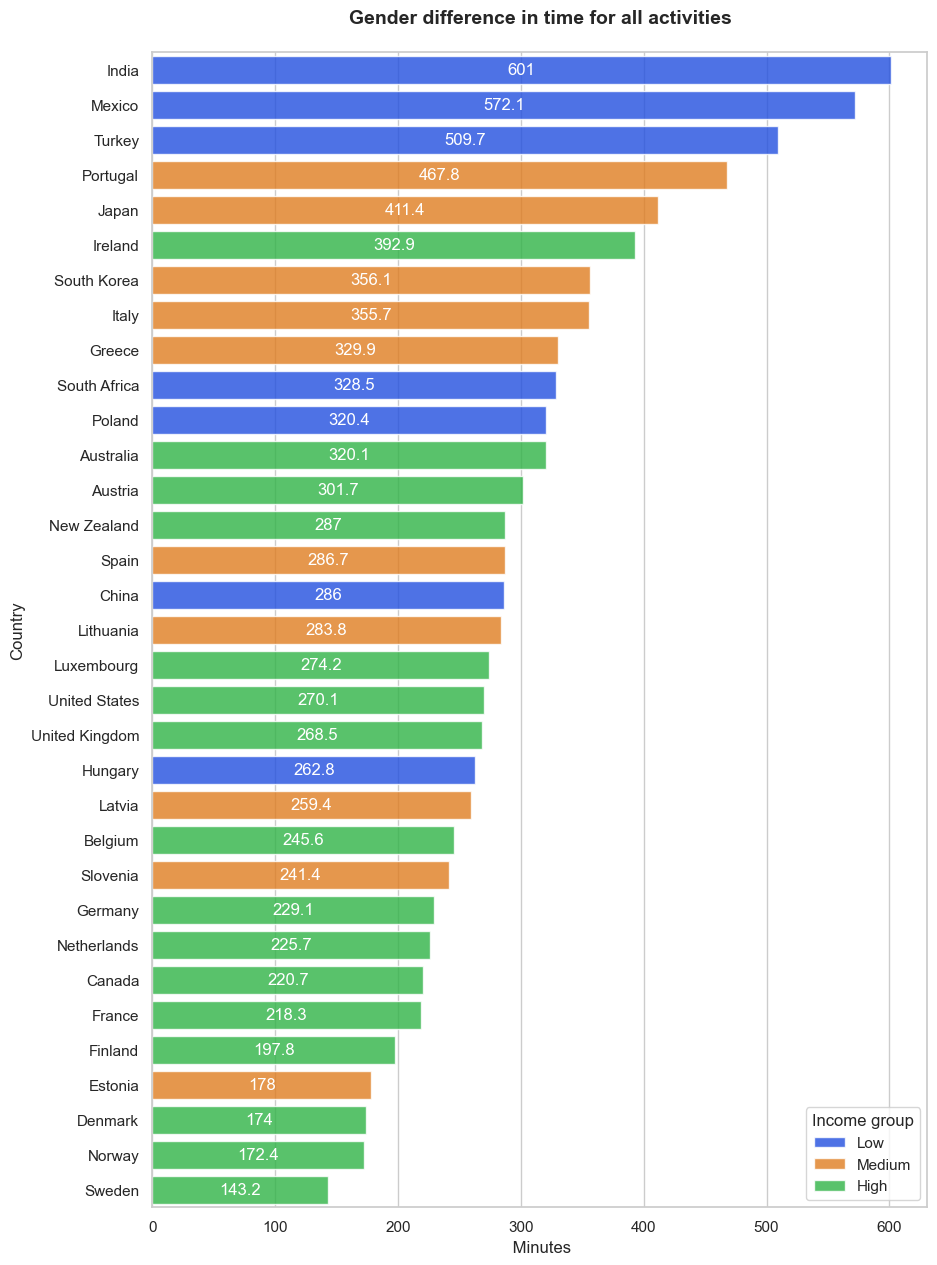

In [90]:
# plot bar chart to show gender difference for all time use data
# in minutes per day 

# set plot size
plt.figure(figsize=(10, 15))

#create bar plot
all_diff = sns.barplot(x='Difference',
                        y='Country', 
                        hue='Income group',
                        dodge=False, 
                        hue_order=['Low', 'Medium', 'High'],
                        alpha=.8,
                        data=country_diff.sort_values('Difference', ascending=False)                                       
                     )
# set x label
all_diff.set(xlabel=' Minutes')

# format plot title
plt.title('Gender difference in time for all activities\n', fontweight='bold', fontsize=14)

# loop to iterate through the list of
# containers and assign each bar a different label

for i in all_diff.containers:
    all_diff.bar_label(i,
                       label_type='center',
                        color='w',                       
                       );

In [91]:
country_diff['Difference'].describe()

count     33.000000
mean     302.787879
std      109.644100
min      143.200000
25%      229.100000
50%      283.800000
75%      329.900000
max      601.000000
Name: Difference, dtype: float64

### Plot Discussion
The bar chart shows each country's sum of gender differences for all Time Use data (in minutes per day)
1. Of the 10 lowest gender difference values 8 are high income countries
2. only 1 high income country, Ireland, is in the 10 highest gender difference values
3. Mexico is 2nd highest for overall gender difference, but was 5th lowest for gender difference for leisure


In [92]:
# save names of countries with highest and lowest gender difference for all activities to 2 variables 

lo_diff = country_diff.loc[country_diff['Difference']==country_diff['Difference'].min()]['Country'].values[0]
print(lo_diff)

hi_diff = country_diff.loc[country_diff['Difference']==country_diff['Difference'].max()]['Country'].values[0]
print(hi_diff)

Sweden
India


''

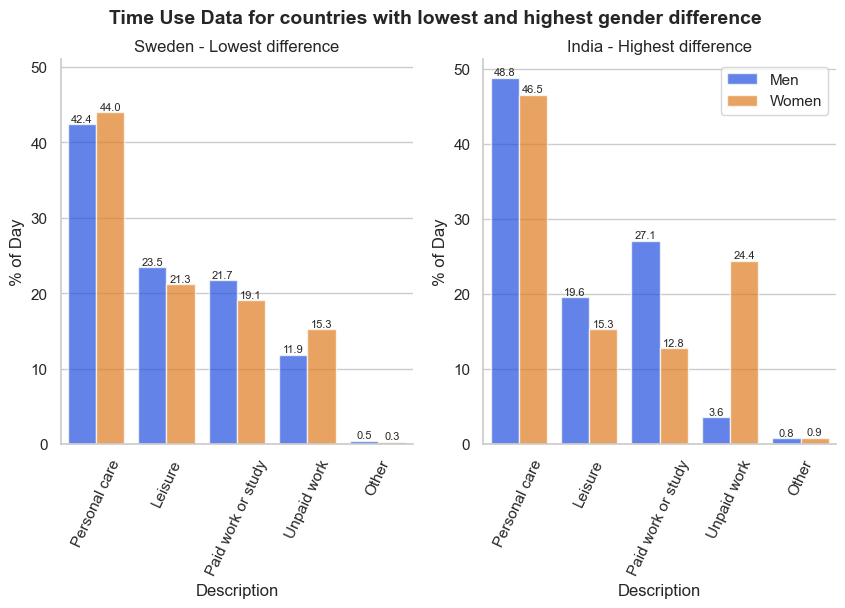

In [93]:

# create subplots of Time Use Data for countries with 
# highest and lowest gender difference on all activities

all_high_low, axes = plt.subplots(1,2, figsize=(10,5))     #create 2 empty subplots
all_high_low.suptitle('Time Use Data for countries with lowest and highest gender difference\n',\
                  fontsize=14, fontweight='bold')  # set main title
 
axes[0].set_ylim(bottom=0, top=51)
axes[0].set_title(f'{lo_diff} - Lowest difference')  #set title for first subplot
axes[0].set_xticklabels(                              #set x labels for first subplot
    labels=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    rotation=65)

 
axes[1].set_title(f'{hi_diff} - Highest difference')  #set title for second subplot
axes[1].set_xticklabels(                                #set x labels second subplot
    labels=['Personal care', 'Paid work or study', 'Unpaid work', 'Leisure', 'Other'],
    rotation=65)


# create bar plot for first subplot    
sns.barplot(                                      
    ax=axes[0],
    data=gender_df[gender_df['Country']==lo_diff],    
    x='Description',
    y='% of Day',
    palette='bright',
    hue='Sex',
    alpha=.7,
    order=['Personal care', 'Leisure', 'Paid work or study', 'Unpaid work', 'Other'],
    hue_order=['Men', 'Women'],
      
)
# create bar plot for second subplot
sns.barplot(                                      
    ax=axes[1],
    data=gender_df[gender_df['Country']==hi_diff],    
    x='Description',
    y='% of Day',
    palette='bright',
    hue='Sex',
    alpha=.7,
    order=['Personal care', 'Leisure', 'Paid work or study', 'Unpaid work', 'Other'],
    hue_order=['Men', 'Women']
)  

axes[0].legend([], frameon=False)  # remove legend from first plot
axes[1].legend(title='')   #remove legend title from second plot 

sns.despine()

# label bars of first plot
for i in axes[0].containers:                      
    axes[0].bar_label(i, fontsize=8, fmt='%.1f')

# label bars of second plot    
for i in axes[1].containers:                      
    axes[1].bar_label(i, fontsize=8, fmt='%.1f')


;

In [100]:
# India's Time Use data
select_c('India')

,Description,Men,Total,Women
0,Leisure,282.643280,253.996120,220.948490
1,Other,12.246449,12.388403,12.552157
2,Paid work or study,390.571080,294.979400,184.703670
3,Personal care,702.771910,687.489930,669.860350
4,Unpaid work,51.767242,191.146150,351.935300


In [101]:
# Sweden's Time Use data
select_c('Sweden')

,Description,Men,Total,Women
0,Leisure,338.0,321.484560,306.212650
1,Other,7.0,6.139856,5.003475
2,Paid work or study,313.0,293.406860,275.191100
3,Personal care,611.0,622.469540,633.439880
4,Unpaid work,171.0,196.499180,220.152880


### Note

1. Sweden's men and women follow a similar pattern in the order of most time use, starting with:
    - Personal care
    - leisure
    - Paid work or leisure
    - Unpaid work
    - other
 
1. India's women spend most time on unpaid work, after personal care
1. India's men spend most time on paid work or study after personal care
1. Personal care is higher for India, men and women, than Sweden
1. Leisure is higher for Sweden, men and women, than India
1. While the combined - men and women's, paid work and unpaid work is similar for both countries there is significant difference in the distribution of work  
    - India's women combined work and unpaid work is 6.5% (94mins) more than India's men, and 62 mins less leisure time
    - Sweden's women combined work and unpaid work is 0.8% (12mins) more than Sweden's men, and 32 mins less leisure time
    
1. Combining time for work (paid and unpaid):
    - India's women recorded 41 mins more than Sweden's women
    - Sweden's men recorded 41 mins more than India's men
    
    
In summary
   
   - India's combined work (paid and unpaid) is equivalent to their Norwegian counterparts, but they take less time for leisure
   - distribution of paid and unpaid work is more even for Sweden's men and women than India where:
      - men work more than twice as much paid work than women
      - women work more than 6 times more unpaid work than men
   

In [94]:
gender_diff.reset_index(inplace=True)
gender_diff.rename_axis(None, axis=1, inplace=True)


In [95]:
group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Region              99 non-null     object 
 1   Country             99 non-null     object 
 2   Income group        99 non-null     object 
 3   GDP_per_Capita      99 non-null     int32  
 4   Sex                 99 non-null     object 
 5   Leisure             99 non-null     float64
 6   Other               99 non-null     float64
 7   Paid work or study  99 non-null     float64
 8   Personal care       99 non-null     float64
 9   Unpaid work         99 non-null     float64
dtypes: float64(5), int32(1), object(4)
memory usage: 7.5+ KB


### Note

Turn attention to the relationship between the measures in the Time Use Data

In [96]:
group_df.head()

,Region,Country,Income group,GDP_per_Capita,Sex,Leisure,Other,Paid work or study,Personal care,Unpaid work
0,Africa,South Africa,Low,6485,Men,334.19431,13.177400,294.16318,695.37225,102.93914
1,Africa,South Africa,Low,6485,Total,305.89819,16.162130,240.57607,695.07886,182.28479
2,Africa,South Africa,Low,6485,Women,277.60207,18.698801,186.98896,694.82947,261.63044
3,Americas,Canada,High,52722,Men,297.80487,31.768059,340.51254,621.77661,148.13789
4,Americas,Canada,High,52722,Total,278.93344,33.913960,304.64124,636.57739,186.00000


### Data Visualisation

to explore relationship between the data by
            
            - correlation heatmap
            - jointplot
            - scatterplot
            - lmplot



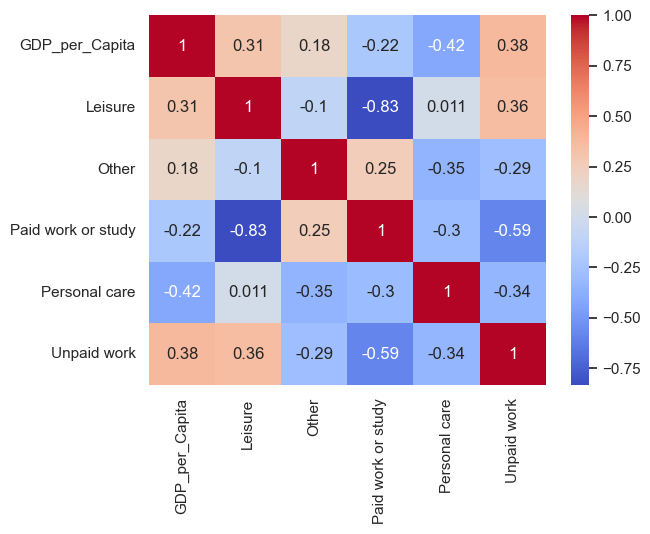

In [97]:
# correlation heatmap of numeric data for men

m_mask = group_df['Sex'] == 'Men'
sns.heatmap(group_df[m_mask].corr(numeric_only=True), 
            annot=True, 
            cmap='coolwarm');

### Plot Discussion
Correlation heat map of numeric data for men shows:

1. strong negative correlation for paid work or study and Leisure
2. negative correlation for:

        - personal care and GDP per capita 
        - paid work or study and unpaid work
        
3. slight negative correlation for:

         - GDP per Capita and paid work or study


3. positive correlation for:

        - unpaid work and GDP per capita
        - unpaid work and leisure
        - GDP per capita and leisure
        
        
#### Suggests men's time for :
- leisure and unpaid work decreases as time for paid work or study increases
- paid work or study and personal care decreases as countries income increases
- leisure and unpaid work increases as countries income increases 


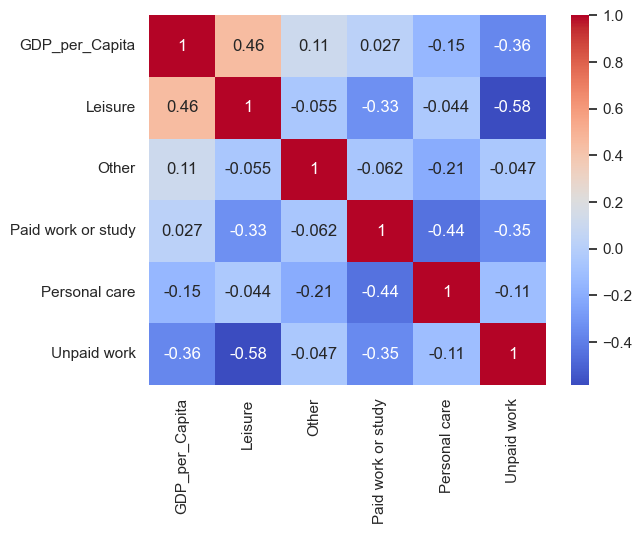

In [98]:
# correlation heatmap of numeric data for women

f_mask = group_df['Sex'] == 'Women'
sns.heatmap(group_df[f_mask].corr(numeric_only=True), annot=True, cmap='coolwarm');

###  Plot Discussion
Correlation heat map of numeric data for women shows:

1. negative correlation for: 

        - unpaid work and GDP per Capita
        - unpaid work and leisure
        - unpaid work and paid work or study
        - paid work or study and personal care
        - paid work or study and leisure
                        
 
2. positive correlation for: 

        - leisure and GDP per capita


#### Suggests women's time for:
- leisure decreases as time for paid work or study, and unpaid work increases
- leisure increases and unpaid work decreases as countries' income increases 
- personal care decreases as time for paid work or study increases

### Note

To gain more insight further explore the relationship between income level and Time Use Data, by gender

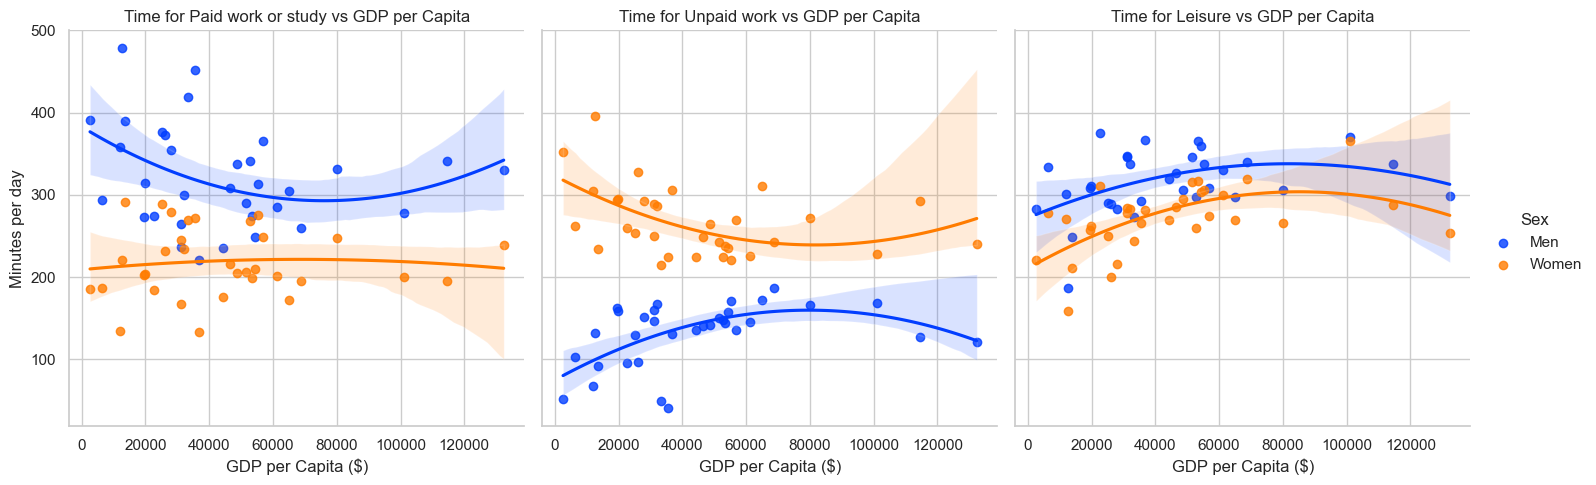

In [99]:
# comparison of regression models 
# across GDP per Capita, with paid work or study, unpaid work, leisure and gender

desc_plot = sns.lmplot(x='GDP_per_Capita',
           y='Value',
           data=gender_df,
           hue='Sex',
           hue_order=['Men', 'Women'],
           col='Description',                      
           col_order=['Paid work or study', 'Unpaid work', 'Leisure'], # columns to include and order            
           order=2,   # parabolic fitted curve                              
           fit_reg=True
          )

desc_plot.set_axis_labels('GDP per Capita ($)', 'Minutes per day')
desc_plot.set_titles(col_template="Time for {col_name} vs GDP per Capita");

###  Plot Discussion
The lmplot shows:
1. Men's time for paid work or study is highest for lower income countries and slightly rises again for the highest income countries
    - suggests men from low income countries need to work more hours to make a living, than middle income countries 
2. Paid work or study is more constant across income levels for women , but the range of values is narrower for higher income countries
3. Time for unpaid work is highest for women from low income countries
    - but there is not an equivalent decrease in time for paid work for women from low income countries
4. Time for unpaid work is lowest for men from low income countries, rises for middle income
    - matching the equivalent increase in time for paid work for men from low income countries
5. The difference between men and women for unpaid work appears to narrow as income levels increase but then widens for the highest income countries
    - suggests as time for paid work decreases for men from middle income countries time for unpaid work increases
6. Time for leisure increases with income level and slightly drops for the highest income countries, for men and women
    - but plot shows men have a more leisure time than women


## Summary of Findings

The Time Use Dataset provides average timing of daily activities of a sample population for each country, so is not representative of all individuals in the country.

- **All countries report men record more leisure time than women**
     - men 21.9%, women 18.8% (mean % of day)
    - The top 6 countries for highest leisure time gender difference are all European and medium income countries
    - Men's time for leisure and unpaid work increases as countries income increases and time for paid work or study decreases
    - Leisure time also increases for women as countries' income increases but unpaid work decreases.
    - These findings suggest that time for leisure is a luxury, in that it requires:
        - free time
        - expendable income
     - men from lower income countries take more time for paid work and personal care than men from higher income countries
     - women from lower income countries take more time for unpaid work 
     - as women increase time for paid work or study and unpaid work they have less time for personal care and leisure
     

    
<br/>

- **All countries report men undertake more paid work than women**
    - men 22.3%, women 15.1% (mean % of day)
<br/>
	

- **All countries report women undertake more unpaid work than men**
     - men 9.1%, women 18.6%  (mean % of day)
<br/>

While it would seem an equal swap off between men and women of paid and unpaid work respectively, are they equivalent?

- **Individuals who work more unpaid hours than paid are disadvantaged, as those working more paid hours have**:
    - Rewards - pay, financial independence, financial security
    - Sense of self - self-esteem, self-identity
    - Socially - interaction, social standing
    - Rights - protection, support
    - start & finish time to working hours 
        - the nature of unpaid work means it can start the moment a person wakes up until they go to sleep, and it can spill over into other activities - leisure, personal care. 
        - so not only do women have less leisure time than their male counterparts there could be a difference in the quality of that time.

<br/>


- **The differences in time use between countries suggest the influence of  multiple factors, some of which appear to be**: 
    - income level
    - cultural differences
    
<br/>

- **European/ high & medium income countries**
    - highest for leisure
    - lowest for paid work 
    - women's unpaid work goes down as income level rises
    
<br/>

- **Asian countries**
    - men feature in highest countries for paid work and lowest for unpaid work
    - time for paid work or study for Asian countries men increases with income
    - China is the only Asian country time for paid work and study was higher than unpaid work for women
    
<br/> 

- **Out of the 33 countries in the Time Use dataset, only 6 countries reported women's time for paid work was more than unpaid work**
    - Canada
    - China
    - Japan
    - South Korea
    - Latvia
    - Sweden

<br/>

- **All countries reported men's time for paid work was more than unpaid work** 

<br/>

#### Anomalies

   - **Australia** is the only high income country who's women are in the top 5 countries for highest time for unpaid work and the top 5 countries for lowest time for paid work
   - **Mexico** 
        - only non-Asian country to top men's highest time for paid work or study. 
        - the 5th lowest of all the countries for gender difference in leisure time 
        - Mexico men and women top lowest leisure time
        - Mexico is 2nd highest for overall gender difference in time use
        
   - **Hungary** has the lowest overall gender difference for a low income country.  Hungary’s  gender difference is lower than USA and UK.   
   
        - Interestingly Hungarian biochemist Katalin  Karikó,  winner of 2023 Nobel Prize in Medicine, for her contributions to the COVID-19 vaccines, that saved millions during the Covid-19 pandemic, comes from a humble background. She recounts how the Hungarian state education system allowed her to earn a Ph.D, and high quality childcare meant she could continue to work after having a child; a child who grew up to be a two-time Olympic gold medal winner in rowing
        - It can not be understated the importance of opportunity for individuals to reach their potential

<br/>
          



#### Further questions to ask
    
- What are the barriers to women taking on more paid work?
    - caring responsibilities
    - skill level
    - cultural/personal expectations
    - state provisions (child care)
    - paid work opportunities
    - gender pay gap
    
- What are the barriers to men taking on more unpaid work?   
    - availability
    - cultural/personal expectations
    - gender pay gap
  
 

## Suggestions for further investigation

1. How does time use changes over a lifetime? A time use study across generations
1. How has time use changed over time? A study of time use over the last century
1. How wellbeing measures relate to time use
1. Gender pay gaps of the 33 countries in the Time Use data set


## Data Sources

### 1. Time Use Database 
- Last updated: December 05, 2023, varied for each country
        Available at OECD - Organisation for Economic Co-operation and Development
### 2. GDP per Capita
- GDP (in USD) Per Capita Income by Country - uploaded April 2023
         Available at Kaggle 

        
